# Assignment 1 specification

The purpose of this assignment is to use EDA on two of the datasets met in class.

## Which datasets to consider?

In [3]:
import random

# Students should replace 12345678 with their student id (8-digit number, starting with 200)
myStudentId = 20094010

# Use myStudentId as the seed for the random number generator
random.seed(myStudentId)

dataSetToIgnore = random.choice(['Tips', 'Titanic', 'Algae'])
dataSetToIgnore

'Algae'

Students should consider 2 sets from 'Tips', 'Titanic', 'Algae', ignoring the set that was randomly selected above.

##Start of EDA 1##

# Task 1: First pass - load data set and initial clean

**Import Modules**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import dtale
import re
import phik
#import pingouin as pg

#plt.style.use("seaborn−darkgrid")

**Load Data Set**\
and initial view

In [5]:
tips_df = pd.read_csv('data/01-Tips/tips.csv')
print(tips_df.shape)
tips_df.head(10)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


From an initial view at the dataframe excerpt above, there doesn't appear to be too much to do in terms of cleaning up the data. Of course, I'll look a bit deeper into the data to see if that's truly the case.\
Looking at the some of the columns, I'm already seeing ways in which this data can be expanded to be able to draw greater conclusions from it. One such way could to be create a column for the bill, before the tip. A tip percentage column may also be useful.\
\
I'm going to use the describe() function on the dataframe to learn some statistical information about the numerical data in the dataset.

In [6]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


From this output, I can see the mean, standard deviation, min, max and IQRs for total_bill, tip and size.
Things like the average table size being 2.56 people is worth keeping in mind. These values will help add context when reading some of the visualisations later in the report.\
Knowing the minimum and maximum of some of the numerical columns will also help me effectively create "bounds" on some of the visualizations I'll create later.\
\
Next, I'll utilize the .info() function to show datatype information about each of the columns. This will help me determine if I need to alter any object data types.

In [7]:
display(tips_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


None

We have an issue here... The categorical data is being treated as "object"/
/
Let's fix that by converting the data to categories.\
I can use the .nunique() function to determine the number of unique values for each column. I can match these values up against my own conclusions/understanding of the column values and help better detemine each column's datatype

In [8]:
tips_df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

I can see from the above that for the sex column, there are only two unique data types. This matches up against my understanding of there only being "Male" and "Female" in the data set.\
\
I'll print the unique values for "sex", and see if those two values are in fact just "Male" and "Female".

In [9]:
tips_df.sex.unique()

array(['Female', 'Male'], dtype=object)

Which there are, excellent.\
\
"Sex" is a categorical data type, so I'll declare it as so.

In [10]:
tips_df.sex = pd.Categorical(tips_df.sex)
tips_df.sex.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [11]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    object  
 4   day         244 non-null    object  
 5   time        244 non-null    object  
 6   size        244 non-null    int64   
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 11.9+ KB


Now we can see that the "sex" column data-type is listed as "category", rather than "object". I'll implement the same change for the other categorical data in the set now.\
\
I probably went a bit too in-depth which double checking whether the "sex" column needed data type conversion, but it's no harm being sure. I'll do the same for the other 'should-be-categorical' columns. I won't go into so much detail, showcasing each step here, as I'm confident that they're okay.

In [12]:
tips_df.day = pd.Categorical(tips_df.day, categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=True)
tips_df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur' < 'Fri' < 'Sat' < 'Sun']

In [13]:
tips_df.smoker = pd.Categorical(tips_df.smoker)
tips_df.smoker.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [14]:
tips_df.time = pd.Categorical(tips_df.time, categories=['Lunch', 'Dinner'], ordered=True)
tips_df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch' < 'Dinner']

In [15]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Great, now all the columns that were before considered "object" are now considered "category".
\
Also you can see that the memory usage has decreased, an expected bonus of changing the data type :)

It's worth checking if there are missing values or non-applicables in the dataset. I used the isna() function to this.

In [16]:
tips_df.isna().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

I received an output of just False's, which means in this case, there are no missing values. If any of the outputs returned "True", that would mean that one of the columns has a missing value and I'd have to dig a little deeper.

I mentioned earlier about the idea of creating a "bill before tip" column, and also a "tip %" column. I'll do that now.

In [17]:
tips_df['bill_pre_tip'] = tips_df['total_bill'] - tips_df['tip']
tips_df['tip_percentage'] = (tips_df['tip'] / tips_df['total_bill']) * 100

display(tips_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   total_bill      244 non-null    float64 
 1   tip             244 non-null    float64 
 2   sex             244 non-null    category
 3   smoker          244 non-null    category
 4   day             244 non-null    category
 5   time            244 non-null    category
 6   size            244 non-null    int64   
 7   bill_pre_tip    244 non-null    float64 
 8   tip_percentage  244 non-null    float64 
dtypes: category(4), float64(4), int64(1)
memory usage: 11.2 KB


None

Another thing, since we now have two columns (tip) and (bill_pre_tip), that combined equal the column (total_bill), there's no point having the total_bill column any longer, since we can just as effectively compare (bill_pre_tip) to (tip) and get the same outcome.\
I'll drop the total_bill column to wrap up Pass 1.

In [18]:
tips_df = tips_df.drop(columns = "total_bill")
display(tips_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tip             244 non-null    float64 
 1   sex             244 non-null    category
 2   smoker          244 non-null    category
 3   day             244 non-null    category
 4   time            244 non-null    category
 5   size            244 non-null    int64   
 6   bill_pre_tip    244 non-null    float64 
 7   tip_percentage  244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.3 KB


None

In [19]:
tips_df.rename(columns={'size': 'table_size'}, inplace=True)
display(tips_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tip             244 non-null    float64 
 1   sex             244 non-null    category
 2   smoker          244 non-null    category
 3   day             244 non-null    category
 4   time            244 non-null    category
 5   table_size      244 non-null    int64   
 6   bill_pre_tip    244 non-null    float64 
 7   tip_percentage  244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.3 KB


None

# Task 2: Second pass - individual features and target

##Start of Answer 2##

Now the data is cleaned up, it's time to start the analysis. I'll be going through each of the individual features of the dataset (columns) and analyzing them relative to the target, which in this case will be **tip**.\
\
I want to see what features have an effect on the tip a server receives.\
\
Before I make my graphs, I want to set a couple of templates, palettes and others. This will help me keep my code cleaner and more readable.

In [20]:
male_female={"Male": "cyan", "Female": "purple"}
yes_no={"Yes": "lime", "No": "red"}
lunch_dinner={"Lunch": "Brown", "Dinner": "Orange"}

**Feature 1: Sex**\
The first feature to analyse against the target is 'sex'. In this case, 'sex' refers to the sex/gender of the server who's serving the tables. I don't expect to see a huge difference here.\
\
I'm going to draw a couple of plots here to try and analyse what I'm seeing as best as possible. I'll plot the count for each sex firstly, as well as total bill by sex, and then finally two graphs analysing the tip amount by sex.


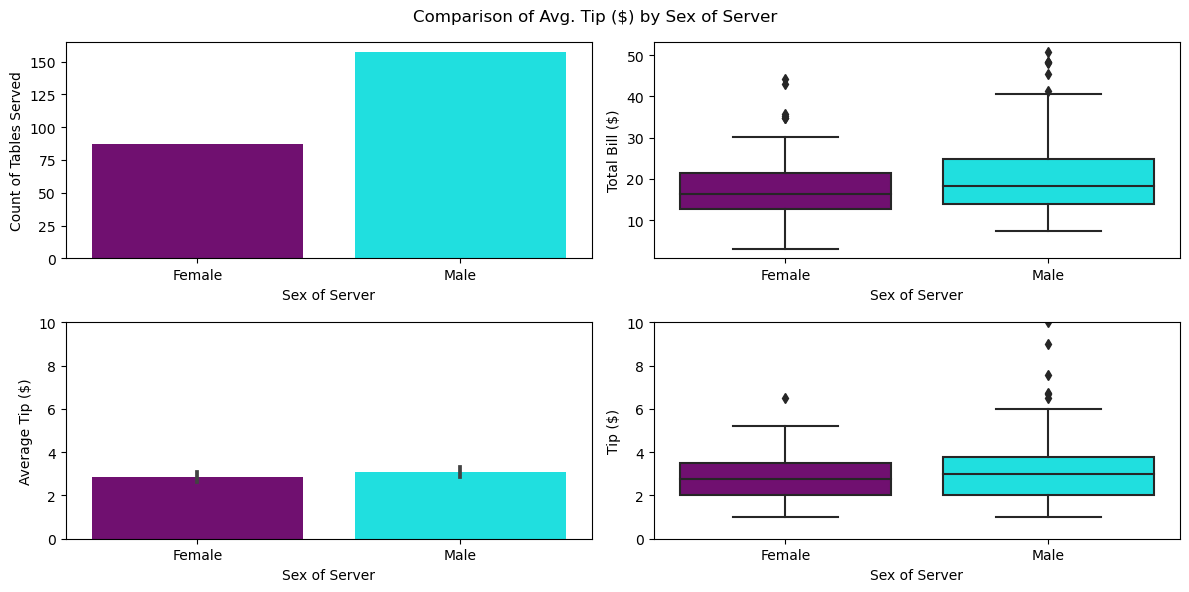

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.countplot(x=tips_df.sex, palette=male_female, ax=axes[0,0])
axes[0,0].set_xlabel("Sex of Server")
axes[0,0].set_ylabel("Count of Tables Served")
sns.boxplot(x=tips_df.sex, y=(tips_df.bill_pre_tip + tips_df.tip), palette=male_female, ax=axes[0,1])
axes[0,1].set_xlabel("Sex of Server")
axes[0,1].set_ylabel("Total Bill ($)")
sns.barplot(x=tips_df.sex, y=tips_df.tip, palette=male_female, ax=axes[1,0])
axes[1,0].set_xlabel("Sex of Server")
axes[1,0].set_ylabel("Average Tip ($)")
sns.boxplot(x=tips_df.sex, y=tips_df.tip, palette=male_female, ax=axes[1,1])
axes[1,1].set_xlabel("Sex of Server")
axes[1,1].set_ylabel("Tip ($)")

y_min, y_max = 0, 10
axes[1,0].set_ylim(y_min, y_max)
axes[1,1].set_ylim(y_min, y_max)

plt.suptitle("Comparison of Avg. Tip ($) by Sex of Server")
plt.tight_layout() # Best practice to prevent overlapping
plt.show()

*Report/Conclusions*
- Male servers serve more tables (>150/~90), however this won't have an effect on average tip. (Top Left)
- The total bill at tables served by men has a slightly greater mean, as well as a decently higher average range, indicated by the whiskers. (Top Right)
- The average tip for both men and women is almost the exact same, with men edging it slightly. (Bottom Left)
- There are a significant number of higher-end tips from tables served by men. This could be indicative of something else, or might just be chance since there were more tables served by men. Perhaps some of these higher tips could be considered outliers?

**Feature 2: Smoker**\
The second feature to analyse is "smoker". This feature represents if a table is seated in the smoking area of the restaraunt/cafe, or essentially if members of the table have a smoking preference.\
\
I'll perform a similar analysis to what I did above for "sex", since I'm once again dealing with a categorical data type.

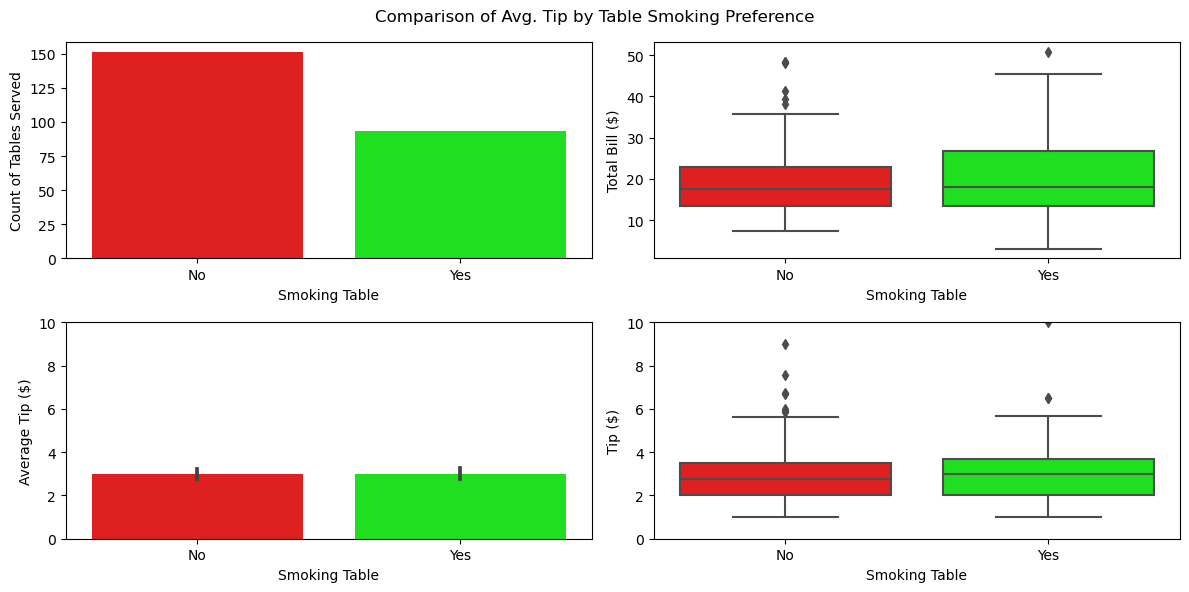

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.countplot(x=tips_df.smoker, palette=yes_no, ax=axes[0,0])
axes[0,0].set_xlabel("Smoking Table")
axes[0,0].set_ylabel("Count of Tables Served")
sns.boxplot(x=tips_df.smoker, y=(tips_df.bill_pre_tip + tips_df.tip), palette=yes_no, ax=axes[0,1])
axes[0,1].set_xlabel("Smoking Table")
axes[0,1].set_ylabel("Total Bill ($)")
sns.barplot(x=tips_df.smoker, y=tips_df.tip, palette=yes_no, ax=axes[1,0])
axes[1,0].set_xlabel("Smoking Table")
axes[1,0].set_ylabel("Average Tip ($)")
sns.boxplot(x=tips_df.smoker, y=tips_df.tip, palette=yes_no, ax=axes[1,1])
axes[1,1].set_xlabel("Smoking Table")
axes[1,1].set_ylabel("Tip ($)")

axes[1,0].set_ylim(y_min, y_max)
axes[1,1].set_ylim(y_min, y_max)

plt.suptitle("Comparison of Avg. Tip by Table Smoking Preference")
plt.tight_layout() # Best practice to prevent overlapping
plt.show()

*Report/Conclusions*
- There are more non-smoking tables than smoking tables (\~150/\~100), this doesn't really mean much however. (Top Left)
- The mean total bill for both smoking tables and non-smoking tables is about the same, with a larger bill amount range for smokers. (Top Right)
- Smoking tables and non-smoking tables on average tip almost the exact same. (Bottom Left)
- The average tip for smoking tables may be skewed somewhat by what looks to be an outlier. I may look a bit deeper into that (Bottom Right)

**Features 3 & 4: Day and Time**\
I decided to compare the next two features: "day" and "time" together, since they both deal with units of time. "Day" represents the day of the week in which the table was served (Thursday-Sunday), and "time" is whether the table was served for lunch or dinner.\
\
Both "day" and "time" are categorical, so I'll be using mainly bar charts, count plots etc for this analysis.

day
Thur    16.127563
Fri     16.991303
Sat     15.224903
Sun     16.689729
Name: tip_percentage, dtype: float64 time
Lunch     16.412793
Dinner    15.915000
Name: tip_percentage, dtype: float64


C:\Users\jackd\AppData\Local\Temp\ipykernel_20008\329520417.py:23: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

C:\Users\jackd\AppData\Local\Temp\ipykernel_20008\329520417.py:43: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



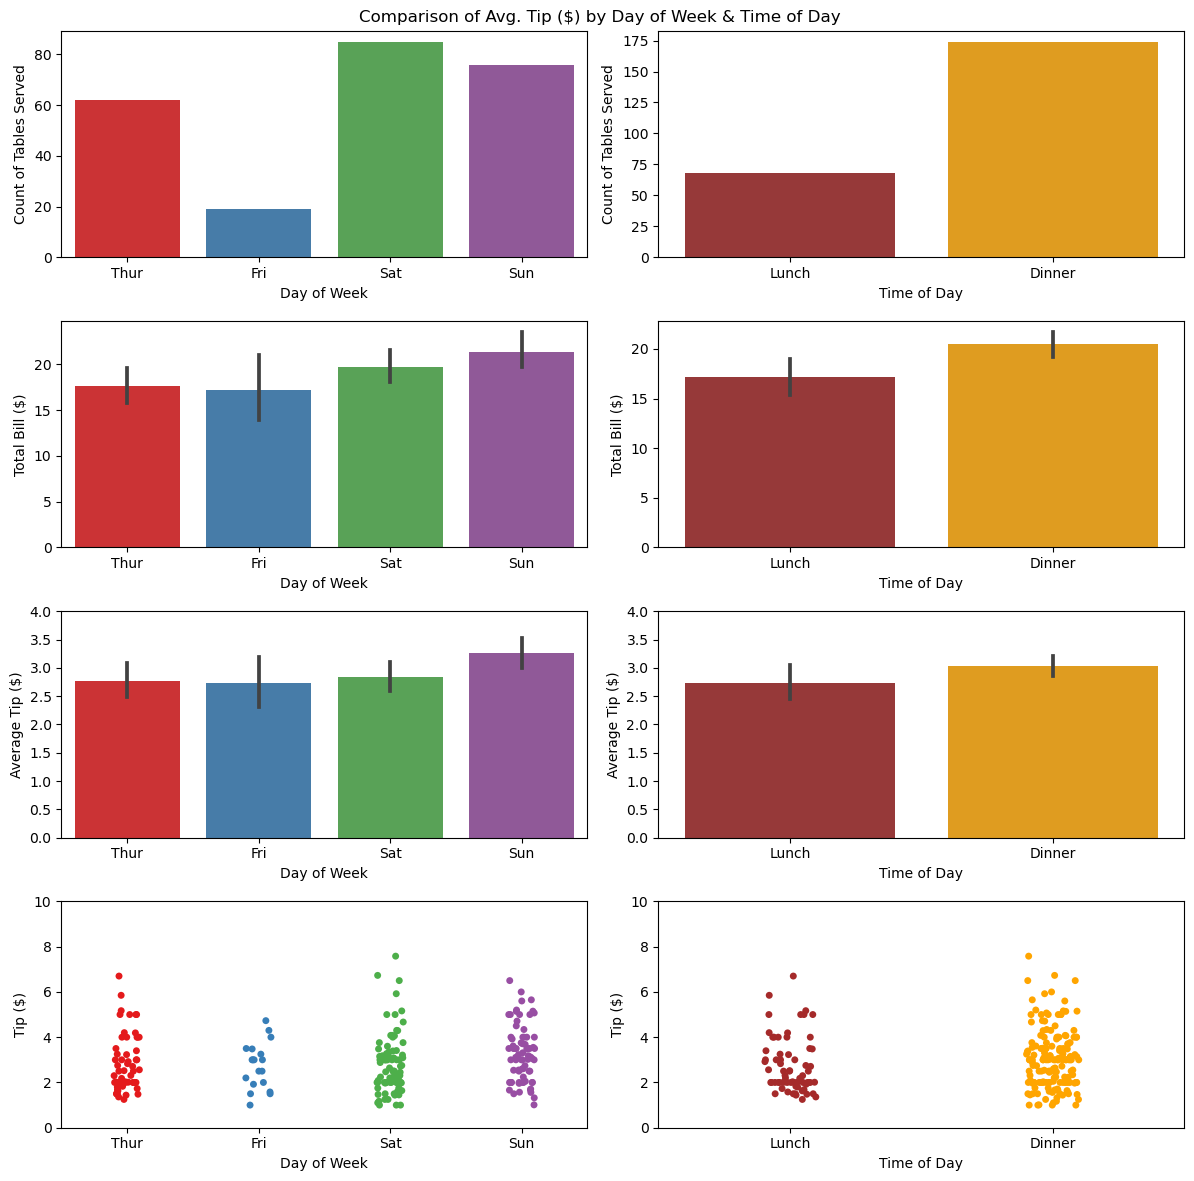

In [146]:
avg_tip_day = tips_df.groupby("day")["tip_percentage"].mean()
avg_tip_time = tips_df.groupby("time")["tip_percentage"].mean()
print(avg_tip_day, avg_tip_time)


fig, axes = plt.subplots(4, 2, figsize=(12, 12))
# top left
sns.countplot(x=tips_df.day, palette="Set1", ax=axes[0, 0])
axes[0,0].set_xlabel("Day of Week")
axes[0,0].set_ylabel("Count of Tables Served")

# 2 down, left
sns.barplot(x=tips_df.day, y=(tips_df.bill_pre_tip + tips_df.tip), palette="Set1", ax=axes[1,0])
axes[1,0].set_xlabel("Day of Week")
axes[1,0].set_ylabel("Total Bill ($)")

# 3 down, left
sns.barplot(x=tips_df.day, y=tips_df.tip, palette="Set1", ax=axes[2, 0])
axes[2, 0].set_xlabel("Day of Week")
axes[2, 0].set_ylabel("Average Tip ($)")

# 4 down, left
sns.stripplot(x=tips_df.day, y=tips_df.tip, palette="Set1", ax=axes[3, 0])
axes[3, 0].set_xlabel("Day of Week")
axes[3, 0].set_ylabel("Tip ($)")

# top right
sns.countplot(x=tips_df.time, palette=lunch_dinner, ax=axes[0, 1])
axes[0,1].set_xlabel("Time of Day")
axes[0,1].set_ylabel("Count of Tables Served")

# 2 down, right
sns.barplot(x=tips_df.time, y=(tips_df.bill_pre_tip + tips_df.tip), palette=lunch_dinner, ax=axes[1, 1])
axes[1,1].set_xlabel("Time of Day")
axes[1,1].set_ylabel("Total Bill ($)")

# 3 down, right
sns.barplot(x=tips_df.time, y=tips_df.tip, palette=lunch_dinner, ax=axes[2, 1])
axes[2,1].set_xlabel("Time of Day")
axes[2,1].set_ylabel("Average Tip ($)")

# 4 down, right
sns.stripplot(x=tips_df.time, y=tips_df.tip, palette=lunch_dinner, ax=axes[3, 1])
axes[3,1].set_xlabel("Time of Day")
axes[3,1].set_ylabel("Tip ($)")

axes[2,0].set_ylim(0,4)
axes[2,1].set_ylim(0,4)
axes[3,0].set_ylim(y_min, y_max)
axes[3,1].set_ylim(y_min, y_max)

plt.suptitle("Comparison of Avg. Tip ($) by Day of Week & Time of Day")
plt.tight_layout()
plt.show()

*Report/Conclusions*
- Saturday is the busiest day, followed by Sunday, Thursday and Friday. Friday is significantly lower than the others (which seems surprising to me), and the weekends seem to be quite busy. (Row1, Left)
- The total bill is higher on weekends, perhaps tables are larger on average during the weekend? I'll look at that soon.(Row 2 , Left)
- The average tip is higher on weekends, particularly Sunday. This is likely influenced by the total bill being higher on the weekend.(Row 3, Left)
- Theres a greater spread of tip amounts on Saturday that the other days, where it's a lot more bunched up (Row 4, Left)
- Far more tables are served for dinner than for lunch (\~175/~70). (Row 1, Right)
- The total bill is higher at dinner time.
- The average tip is higher for dinner. This is likely because people spend more at dinner (Row 3, Right)
- The tip amount for dinner may be somewhat influenced by those rarer, higher tips around the $9-10 mark. (Row 4, Right)

**Feature 5: Table Size**\
This feature was initially named "size", but since I renamed it to "table_size", I'll refer to it as that. It means what you expect: the table size, i.e. the number of patrons sitting at the table that's being served. This is a numerical column, but since the table has a minimum of 1 and a max of 6 (by the looks of it), it can be treated somewhat like a categorical.

table_size
1    21.729202
2    16.571919
3    15.094997
4    14.483037
5    14.149549
6    15.622920
Name: tip_percentage, dtype: float64


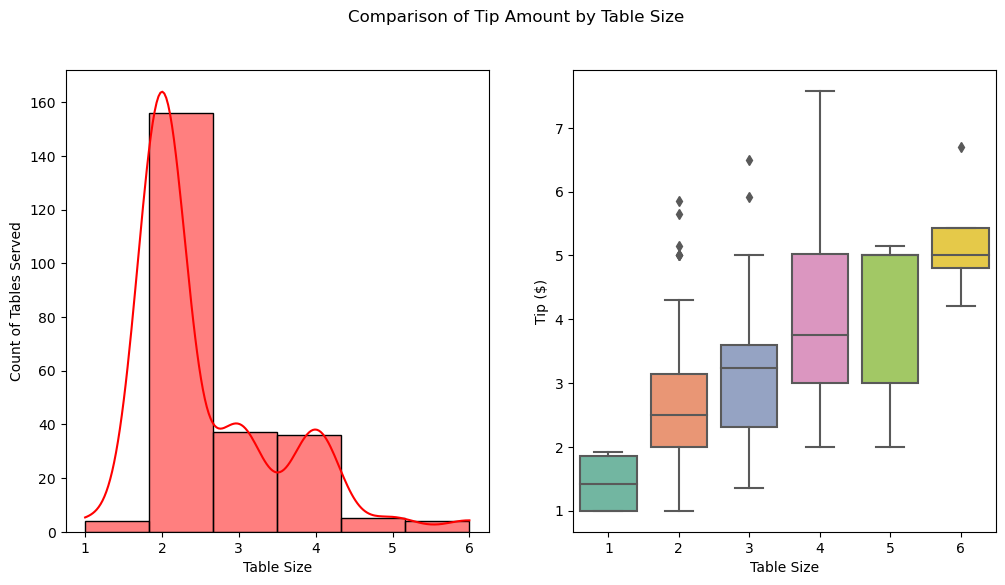

In [147]:
avg_tip_ts = tips_df.groupby("table_size")["tip_percentage"].mean()
print(avg_tip_ts)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=tips_df, x="table_size", bins=6, kde=True, color="red", ax=axes[0])
axes[0].set_xlabel('Table Size')
axes[0].set_ylabel('Count of Tables Served')

sns.boxplot(x=tips_df.table_size, y=tips_df.tip, palette="Set2", ax=axes[1])
axes[1].set_xlabel("Table Size")
axes[1].set_ylabel("Tip ($)")

plt.suptitle('Comparison of Tip Amount by Table Size')
plt.show()

*Report/Conclusions*
- The tip percentage was higher for tables of two, and didn't change much for other table sizes
- A table of two is by far the most common table size, with nearly 160 of the total 244 tables being of size 2. (Left)
- Tables of two and three are similarly common, sitting around a count of 40 each. (Left)
- Tip amount appears to increase relative to table size. But since there's not much data for tables of size 1, 5 and 6, this may not be the case. In my head, it would make sense though. If a table has 6 people, they'd be more likely to rack up a higher bill, resulting in a larger average tip. (Right)

*Visualization Info*
- The graph on the left is a histogram, visualizing the distribution of tables by size. The overlaid line is called a "kernel density estimate" or "KDE", which provides a smoothed representation of the data. The "bins" modifier can be used to configure the number of intervals in the histogram. If I set bins=11, it would leave gaps in between each bar.

**Pass Two Wrap-Up**\
I mentioned earlier a couple of times that the tip column may be skewed somewhat by an outlier or two. I'm going to do a check of the column to see if any data does register as an outlier, and drop the data in question.\
A popular way to check outliers is the "interquartile range method", where you identify data points that may be outliers using the IQR and a multiplier, which I set to 3, after a bit of messing around with the value.

In [25]:
q1 = tips_df['tip'].quantile(.25)
q3 = tips_df['tip'].quantile(.75)
iq_range = (q3 - q1)
multiplier = 3
lower = q1 - 3 * iq_range
upper = q3 + 3 * iq_range

outliers = tips_df[(tips_df['tip'] < lower) | (tips_df['tip'] > upper)]
print(outliers.tip)

170    10.0
212     9.0
Name: tip, dtype: float64


In [26]:
tips_df = tips_df.drop(outliers.index)

To wrap up this pass, I want to do a visual comparison of the numerical values in the dataframe. After a bit of research, I found the "pairplot" would be the most effective way of doing this. A pairplot allows you to create a grid of plots (scatterplots, histograms, etc.) for multiple numerical variables.\
I used modifiers such as "plot_kws" and "diag_kws" to add colour to the graph (which doesn't actually mean anything other than to make the graphs more visually appealing)

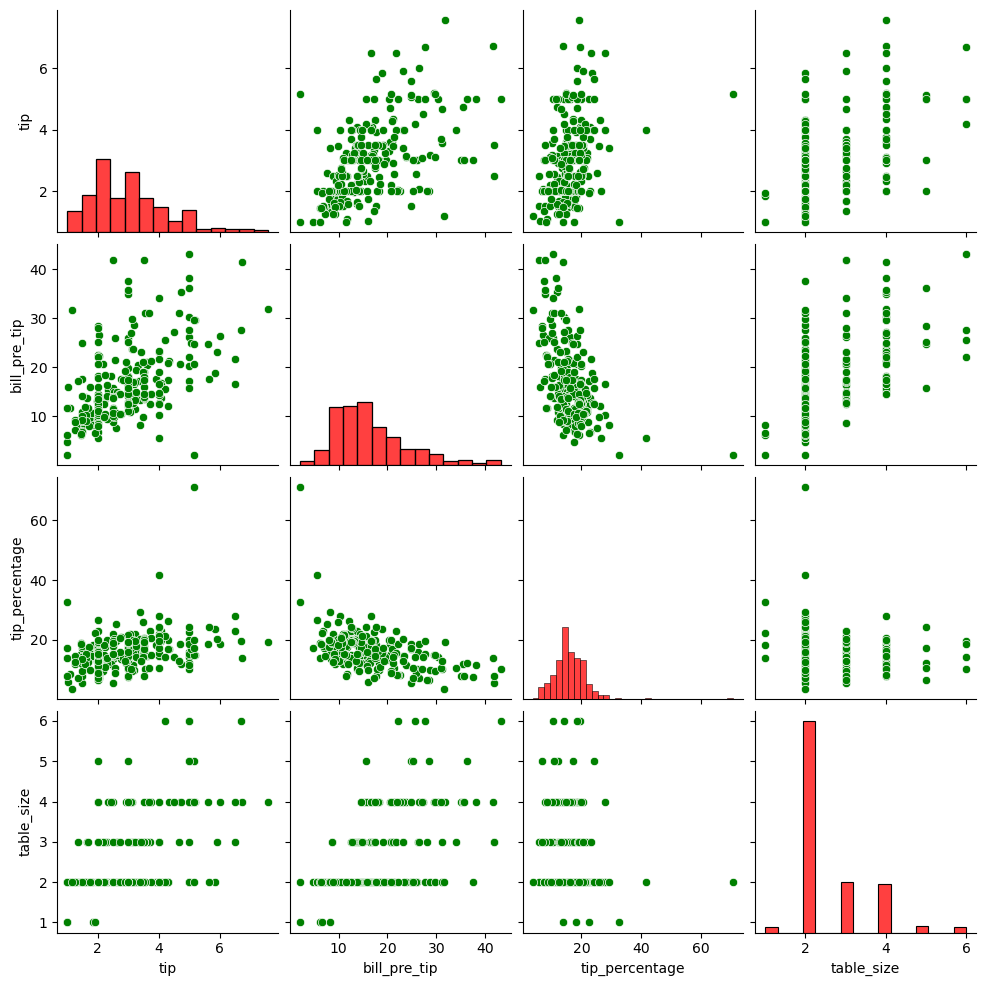

In [27]:
sns.pairplot(tips_df, vars=["tip", "bill_pre_tip", "tip_percentage", "table_size"], diag_kws={'color': 'red'}, plot_kws={'color': 'green'})

*Report/Conclusions*
- Tip slightly increases as the table size increases.
- Pre-Tip Bill increases as the table size increases.
- Tip% might actually get slightly lower as the table gets bigger?
- Tip compared to tip% leans slightly more in favour of tip.
- Tip% drops as the pre-tip bill gets bigger
- The tip gets bigger as the pre-tip bill gets bigger.

*Visualization Info*
- You only need to read one side of the diagonal, since the whole plot is mirrored along the diagonal

##End of Answer 2##

# Task 3: Third pass - relationships between features and target

##Start of Answer 3##

In [28]:
print("Minimum Total Bill:", (tips_df['bill_pre_tip']+tips_df['tip']).min())
print("Maximum Total Bill:", (tips_df['bill_pre_tip']+tips_df['tip']).max())

Minimum Total Bill: 3.07
Maximum Total Bill: 48.27000000000001


I found when initially creating this graph that it was just too messy. I was plotting every single point individually and the x-axis looked all over the place. I decided to group the total_bill amounts into $10 groups, and then represent the data in a cleaner, more readable way.
This should still give me what I'm looking for: that there's a positive correlation between total_bill and tip

**Comparing Table Size by Total Amount**

I wanted to see if the size of the table affected the bill amount. I reused the same custom category from the previous analysis.
I expected to see a similar outcome, where both features were positively related. I expect to see, as the total_bill increases, the average table size will increase in tow.

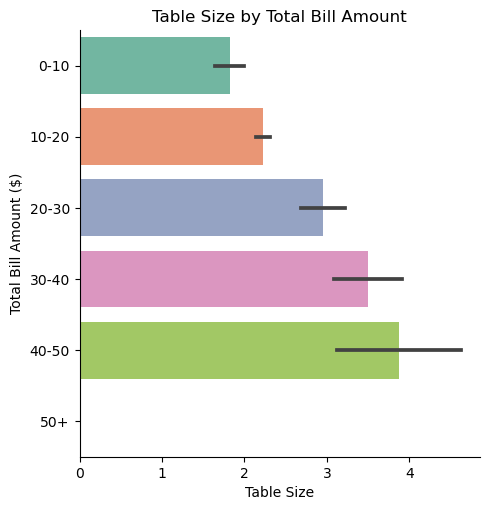

In [30]:
sns.catplot(x="table_size", y="bill_category", kind="bar", data=tips_df, palette='Set2')
plt.xlabel('Table Size')
plt.ylabel('Total Bill Amount ($)')
plt.title('Table Size by Total Bill Amount')
plt.show()

*Report/Conclusions*
- My presumption was correct for this. There is a clear upwards trend when comparing table total_bill amount to table size. There is only one instant where the bill is above 50 dollars, so that's why it appears to drop - I wouldn't look too deep into that and am confident that if there were more bills over 50 dollar, the average table size for those bills would be ~4 or higher.

**Numerical Graphical Correlation Analysis with Pairplot**

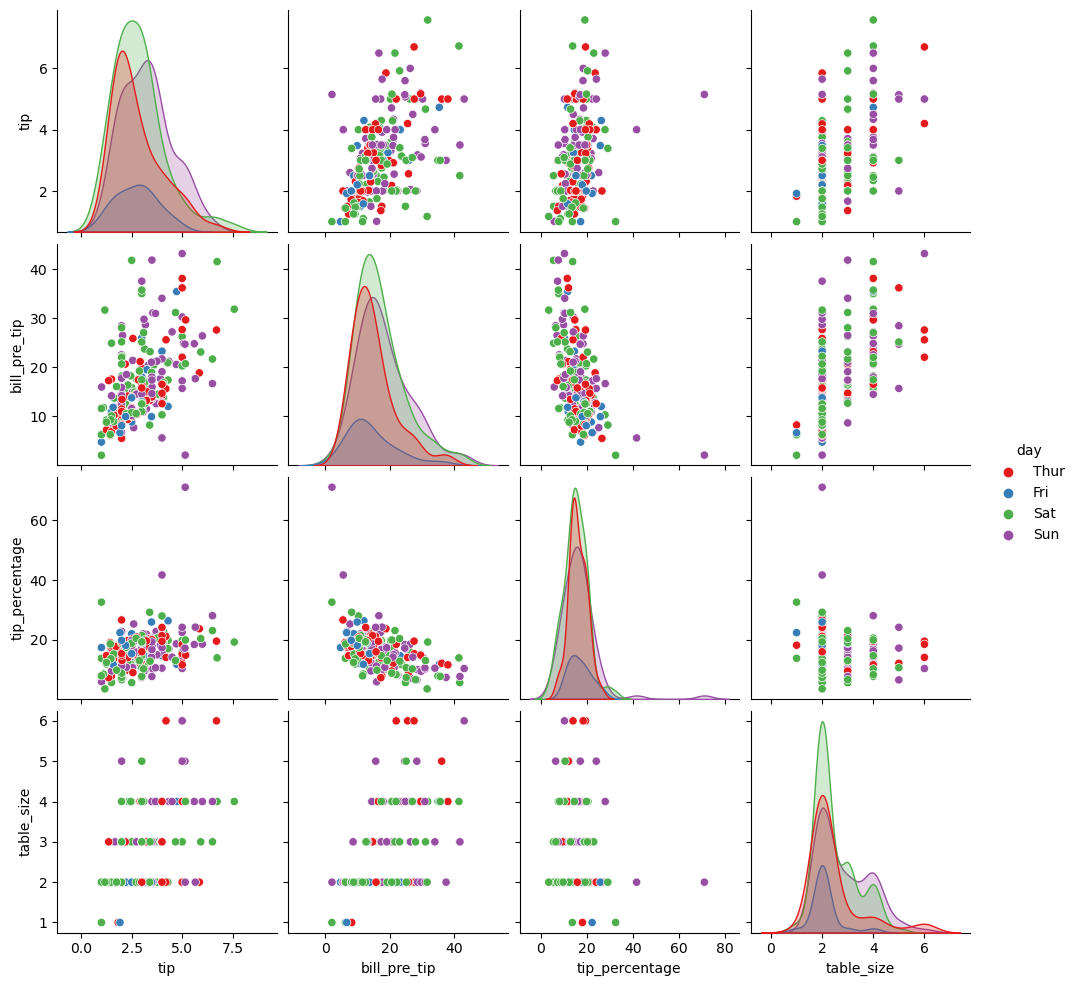

In [31]:
sns.pairplot(tips_df, vars=["tip", "bill_pre_tip", "tip_percentage", "table_size"], hue="day", palette="Set1")

*Report/Conclusions*
- I liked the look of the pairplot in pass two, so decided to try and hue it to a few features and see if it gives anything.
- There doesn't appear to be any grouping present when analysing by day.

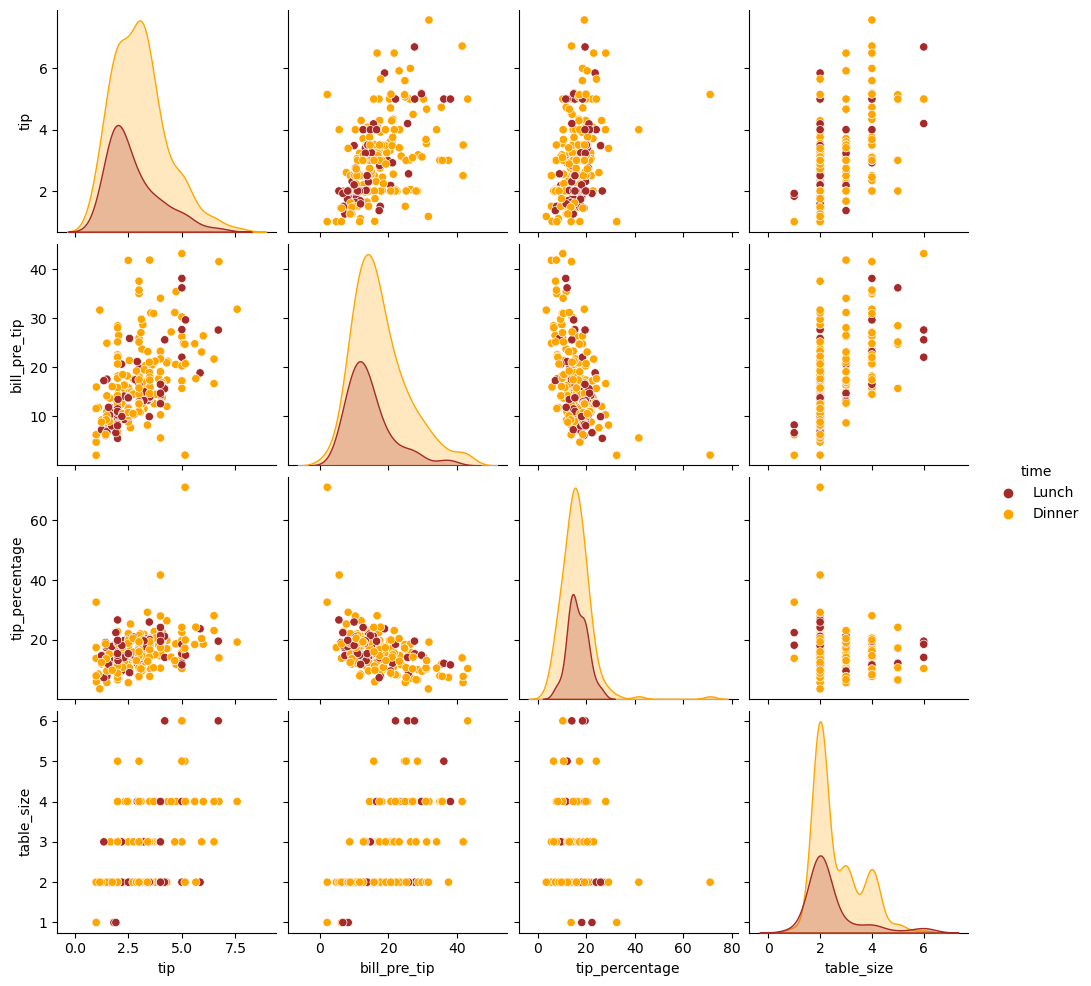

In [32]:
sns.pairplot(tips_df, vars=["tip", "bill_pre_tip", "tip_percentage", "table_size"], hue="time", palette=lunch_dinner)

*Report/Conclusions*
- Once more, there's no distinct grouping present when comparing by time

**Comparing Tip Amount by Table Size**

My initial thinking for this one would be "yes, I would expect the tip amount to increase with the table size". I know that a higher total_bill likely results in a larger tip, and that a larger total_bill is also associated with an increasing larger average table size., so it's my prediction that I should see a positive correlation between the table size and the tip amount.

C:\Users\jackd\AppData\Local\Temp\ipykernel_20008\439377863.py:1: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



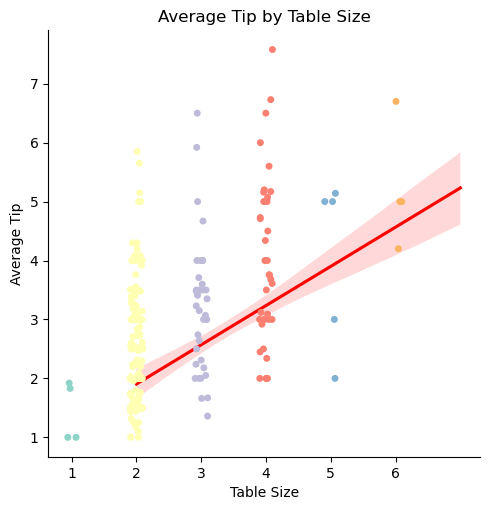

In [33]:
underlay = sns.catplot(x="table_size", y="tip", data=tips_df, palette='Set3')
sns.regplot(data=tips_df, x="table_size", y="tip", scatter=False, color="red", ax=underlay.ax)
plt.xlabel('Table Size')
plt.ylabel('Average Tip')
plt.title('Average Tip by Table Size')
plt.show()

**Pearson's Correlation**

Next, I want to look deeper at the correlation between the numerical values in the data set. There aren't many: only total bill amount, tip and table size.\
To do this, I plan to produce a Heatmap of the correlation values generated by Pearson's Correlation. \
I'll firstly separate the numerical from the dataframe and apply the corr() function to them. From there, I will create a seaborn heatmap of the feature correlations.

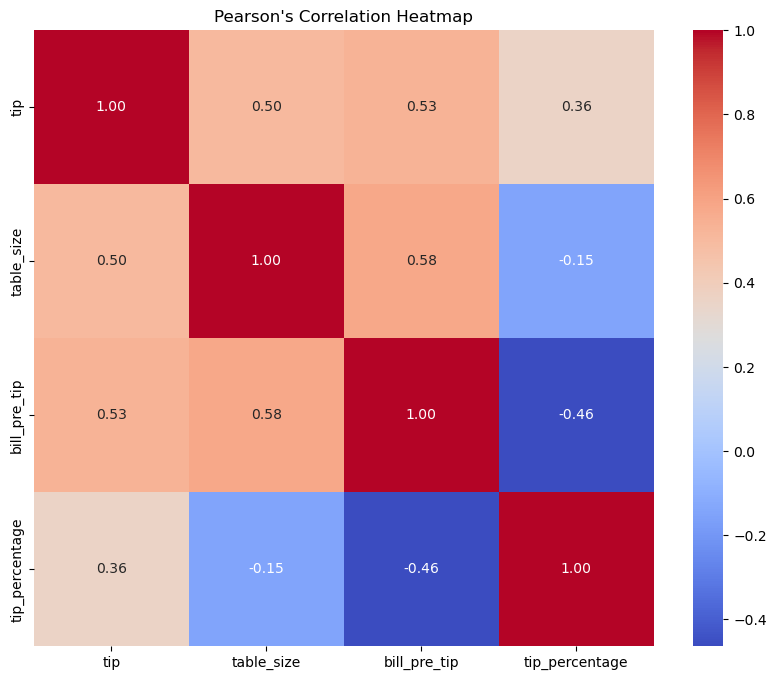

In [34]:
num_cols = tips_df.select_dtypes(include=['number'])
corr = num_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
#               ^ display corr, ^ colour map,  ^ 2 decimal p
plt.title("Pearson's Correlation Heatmap")
plt.show()

There's not much numerical data to go off in this data set, but doing a Pearson's Correlation Heatmap on them produced this output.
I can see a correlation score of .68 between total_bill and tip, suggesting a moderate to strong positive correlation between the two.
The correlation between total_bill and table size sits at .60, lower but still moderate.
A .49 correlation between tip amount and table size is lower still, but still within the range to be considered moderately positive.

The Pearson's Correlation heatmap here helps back up the claims made by the previous graphs, helping aid the authenticity of the correlation suggestions made by them.

**Phik Correlation**\
The phik correlation matrix below works similarly to the Pearson's above, but accounts for categorical variables also.\
It's worth noting that phik doesnt provide information about correlation direction (positive/negative).

interval columns not set, guessing: ['tip', 'table_size', 'bill_pre_tip', 'tip_percentage']
                     tip       sex    smoker       day      time  table_size  \
tip             1.000000  0.000000  0.000000  0.109021  0.210825    0.426758   
sex             0.000000  1.000000  0.000000  0.306657  0.281927    0.068694   
smoker          0.000000  0.000000  1.000000  0.456785  0.000000    0.083416   
day             0.109021  0.306657  0.456785  1.000000  0.995903    0.217601   
time            0.210825  0.281927  0.000000  0.995903  1.000000    0.286603   
table_size      0.426758  0.068694  0.083416  0.217601  0.286603    1.000000   
bill_pre_tip    0.657266  0.072922  0.169184  0.000000  0.230159    0.484024   
tip_percentage  0.260541  0.075035  0.235405  0.000000  0.037298    0.311559   
bill_category   0.517671  0.114151  0.082638  0.078005  0.246349    0.633292   

                bill_pre_tip  tip_percentage  bill_category  
tip                 0.657266        0.260541 

<Axes: title={'center': 'Phik Correlation Heatmap'}>

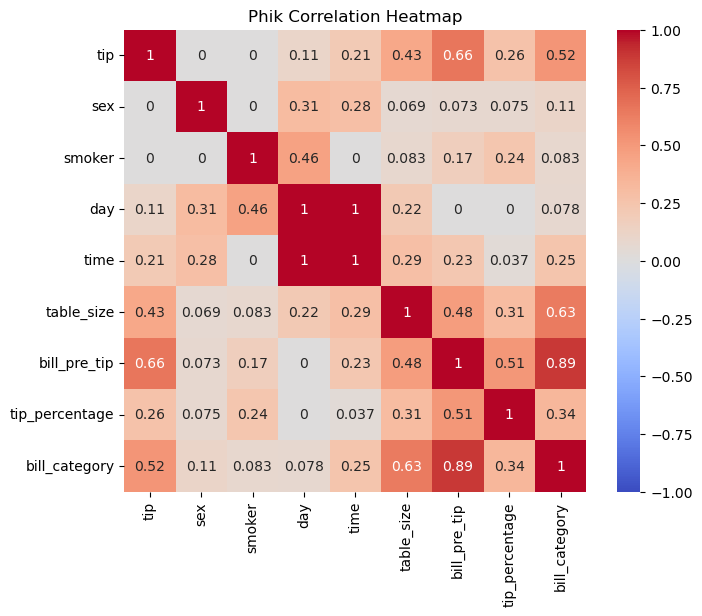

In [150]:
corr = tips_df.phik_matrix()
print(corr)

plt.figure(figsize=(8,6))
plt.title("Phik Correlation Heatmap")
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, vmin=-1, vmax=1)

*Report/Conclusions*
- There are some moderate correlations between table size and bill, which would suggest that bill increases with table size.
- There are some moderately-weak correlations such as day and smoker may (although unlikely) suggest the two are related.

**Comparison of Time over different Days**

I want to see how the time of day that tables are eating compares over different days.\
To do this, I'm going to create a dual bar chart, showing lucnh and dinner side-by-side for each day (Thur-Sun)

TypeError: 'str' object is not callable

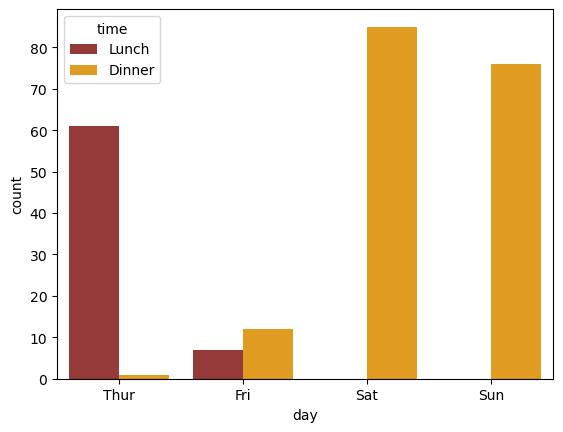

In [151]:
sns.countplot(x ="day",data =tips_df, hue="time", palette=lunch_dinner)
plt.xlabel('Day of the Week')
plt.ylabel('Table Count')
plt.legend(title='Time')
plt.title('Lunch/Dinner distribution by Day')
plt.show()

*Report/Conclusions*
- From the above graph, you can that on Thursday, almost every table is there for lunch. In fact there is almost now dinner tables on that day.
- Friday seems to get very little traffic at all, which honestly surprises me. Perhaps they don't open long on a Friday?
- One thing that jumps out to me almost immediately is the fact that there are no lunch tables on the weekend. The restaraunt must not serve lunch on the weekend.

**Table Size breakdown by Day**

Following on from the lunch/dinner by day of the previous viz, I want to look at how different table sizes differ by day.\
For me, it would make sense to see larger table sizes on weekends, when a lot of people are off work and can meet together.\
I would also think that Thursday nights would be majority 2 person tables, as Thursday night is often synonymous as "date night". I'm going to utilise the same kind of chart I did for the previous visulation, a grouped bar chart, and see if the output is readable.

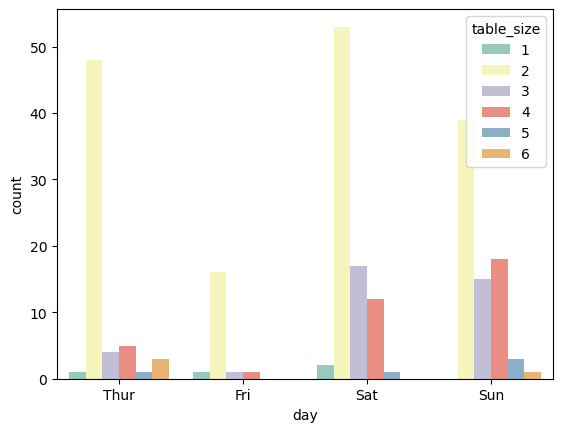

In [149]:
sns.countplot(x="day", hue="table_size", palette="Set3", data=tips_df)
plt.show()

*Report/Conclusions*
- Every night, a person table is the most popular table.
- Weekends on average have higher table sizes, while weekdays do not

**Do Smoking Tables Tip More?**

There's something of a sterotype in the hospitality industry that smokers tip more. I wasn't aware of this myself but decided to put this theory to the test.

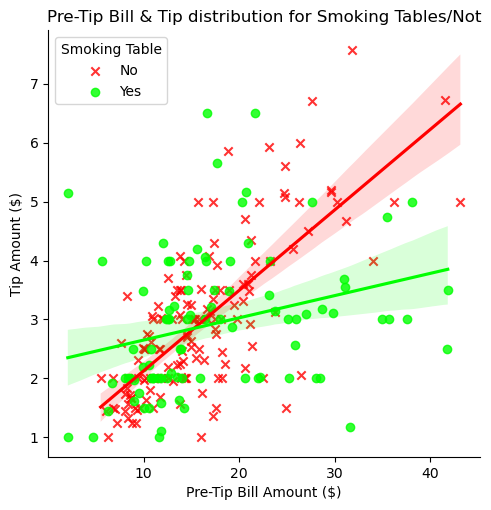

In [37]:
sns.lmplot(x="bill_pre_tip", y="tip", markers=["x", "o"], hue="smoker", data=tips_df, palette=yes_no, legend=False)
plt.legend(title="Smoking Table", loc="upper left")
plt.xlabel('Pre-Tip Bill Amount ($)')
plt.ylabel('Tip Amount ($)')
plt.title('Pre-Tip Bill & Tip distribution for Smoking Tables/Not')
plt.show()

There's a lot going on in this graph above, so I did a few things to make it a bit more readable. I used my pre-defined yes/no colour palette and changed the markers for each to "x" and "o".\
The lmplot works similarly to regplot, but allows for multiple regression fits. I used it for it's trend-line functionality.\
One can make out from the graph that the non-smoker tables average tip amount does follow more of an upwards trend as the pre tip bill increases.\
I'm going to do a bit more analysis on this before I draw any conclusions.

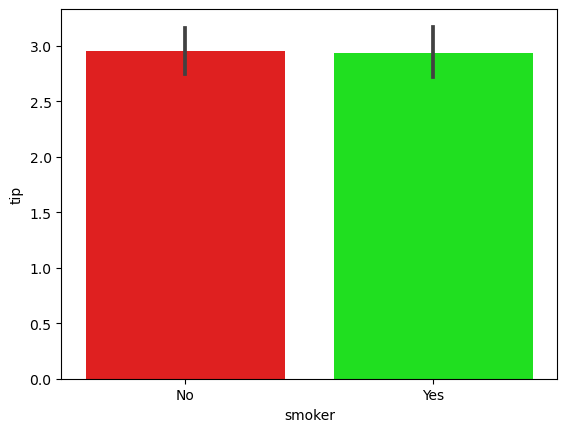

In [154]:
sns.barplot(x="smoker", y="tip", data=tips_df, palette=yes_no)
plt.show()

This basic graph simply compares the average tip for both smokers and non-smokers.\
This basically tells us that there is little difference in general between how the two groups tip.\
I'm going to look a bit more at the hard numbers and see if there's anything to see there.

In [152]:
smoker = tips_df.groupby('smoker')['tip'].agg(['count', 'mean']).reset_index()
total_tip = tips_df['tip'].sum()
smoker['average_tip_percentage'] = (smoker['mean'] / total_tip) * 100
for i, row in smoker.iterrows():
    if row['smoker'] == 'Yes':
        smoker_type = 'Smokers'
    else:
        smoker_type = 'Non-Smokers'
    
    print(f'{smoker_type}:')
    print(f'Number of {smoker_type}: {row["count"]}')
    print(f'Average Tip: ${row["mean"]:.2f}')
    print(f'Average Tip Percentage: {row["average_tip_percentage"]:.2f}%')
    print()

Non-Smokers:
Number of Non-Smokers: 150
Average Tip: $2.95
Average Tip Percentage: 0.41%

Smokers:
Number of Smokers: 92
Average Tip: $2.93
Average Tip Percentage: 0.41%



##End of Answer 3##

<H2>Final Conclusions: Tips</H2>

- The tips dataset contained data about a restaraunt/cafe such as the bills, tips, table size, popularity by day/time and much more.
- Both bills and tips ranged in amount from table to table.
- More tables were served by male servers, they weren't tipped significantly more.
- The weekend was the busiest period in the restaraunt, with Friday being the quietest. The average tip didn't show any significant chance for each day.
- Dinner was a more popular time than Lunch. Once again, there was no significant tip amount difference.
- The most popular table size was 2, with tables of 2 also tipping 5% more than other tables, on average (although this may be due to outliers)

In conclusion, there are some features that influence the tipping behavior of the customers in the restaraunt/cafe, although none significantly.


##End of EDA 1##

##Start of EDA 2##

# Task 1: First pass - load data set and initial clean

##Start of Answer 1##

In [40]:
titanic_df = pd.read_csv('data/03-Titanic/train.csv')
print(titanic_df.shape)
titanic_df.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We're dealing with a dataframe of 12 columns with 891 rows.

I'm going to perform titanic_df.info() to get information about the columns, their row count and their data type.

In [41]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From an initial read of the dataset, we can see that we're deadling with 12 columns:\
PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin and Embarked.\
I'm going to go through every one of these columns individually and explore the data they contain.

titanic_df.describe() summarises the statistics (mean, standard deviation, min/max etc.) for the numerical columns in the dataset.

In [42]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I'll also check for missing values with the .isnull() function. This will output the number of null data entries for each column.

In [43]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now I have a general understanding of what I'm dealing with, I can move onto cleaning the dataset. There's quite a bit to do here to get this data to a point where I can start creating visualisations and exploring & making observations upon said visualisations

One of the first things I can see here is that there is a pointless index column. Every passenger in the dataset has a unique passengerId. I believe I can set this value to act as our index.

In [44]:
passengerIdList = titanic_df['PassengerId'].tolist
print(passengerIdList)

<bound method IndexOpsMixin.tolist of 0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64>


In [45]:
titanic_df = titanic_df.set_index('PassengerId')
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


If i identify ther number of unique values for each column, that will more accurately help me depict what could be considered categorical or not.

In [46]:
titanic_df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

I can see from the above output that:\
Survived has two unique values, 0 and 1, indicating no and yes.

In [47]:
titanic_df.Survived.unique()

array([0, 1], dtype=int64)

I'm going to do what I did in the previous EDA (tips) and convert some of the should-be categorical variables into the category data type

In [48]:
titanic_df.Survived = pd.Categorical(titanic_df.Survived)
titanic_df.Pclass = pd.Categorical(titanic_df.Pclass)
titanic_df.Sex = pd.Categorical(titanic_df.Sex)
titanic_df.Embarked = pd.Categorical(titanic_df.Embarked)

In [49]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 59.7+ KB


I defined "Survived", "Pclass", "Sex", & "Embarked" as categorical variables.

I want to extract the passenger's title from their name and make it a seperate column. There are very likely other ways to do this, such as the .split() function, but my initial idea was to use RegEx, since I'm familiar with it.

In [50]:
pattern = r',\s(.*?)\.'
titles = [re.search(pattern, name).group(1) for name in titanic_df['Name']]       
titanic_df['pTitle'] = titles
titanic_df.pTitle = pd.Categorical(titanic_df.pTitle)
display(titanic_df.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pTitle
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


As you can now see, there is a new column called pTitle. I will use this for future analysis. I also made this column categorical.\
\
The next thing I'm going to look at is null values. I'm going to see if there are any null values in the data. I already know theres quite a few, but its worth pinpointing in which columns they exist so that I can figure out how to deal with them.

In [51]:
titanic_df.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
pTitle      False
dtype: bool

There are null values in "Age", "Cabin" & "Embarked". I'm going to see how many null values are in each of these columns.

In [52]:
nan_counts = titanic_df[["Age", "Cabin", "Embarked"]].isna().sum()
nan_counts

Age         177
Cabin       687
Embarked      2
dtype: int64

There are 177 null values for Age, 687! for cabin and only 2 for embarked.\
There are far too many rows to deal with for cabin, it would cause far too much noise trying to wrangle with that. There's only 2 missing values for embarked which can be dealt with relatively easily.\
\
The biggest problem is going to be with age. There are 177 missing rows, enough to justify tackling it but not too many that it would tarnish the data too much.\
I think age may also be an important factor relative to the target, which I will touch on later.\
The simplest approach will be to use an average (probably mean) to fill in the missing ages. However, having just one value to fill into 177 rows would skew the data significantly, so I need to do some "grouping" and apply the mean to those in said group.\
Likely the best way to do this would be to use a categorical column with a handful of different values and no missing values. Thankfully, we now have just that thanks to the creation of the "pTitle" column, storing 17 different passenger titles.

In [53]:
title_group = titanic_df.groupby("pTitle")
mean_age_group = round(title_group["Age"].mean())
print(mean_age_group)

pTitle
Capt            70.0
Col             58.0
Don             40.0
Dr              42.0
Jonkheer        38.0
Lady            48.0
Major           48.0
Master           5.0
Miss            22.0
Mlle            24.0
Mme             24.0
Mr              32.0
Mrs             36.0
Ms              28.0
Rev             43.0
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64


And now I have the mean age of every group, rounded to the nearest whole number. Now I need to set the missing values for age to these values here.

In [54]:
def fill_ages(p):
    if pd.isna(p["Age"]): # Checks if age is missing
        return mean_age_group[p["pTitle"]] # Assigns mean age of group
    else:
        return p["Age"]
titanic_df["Age"] = titanic_df.apply(fill_ages, axis=1)
print("Missing values for age: ",titanic_df["Age"].isna().sum())

Missing values for age:  0


Great! There's now no more missing values for age. Lastly, I'll deal with the missing values in "Embarked".

In [55]:
print(titanic_df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


As you can see, the vast majority of passengers boarded from Southampton (S), meaning there's a high probability the two passengers with missing values also boarded from there.\
Setting the missing values to "S" and re-running the above code, you'll the count for Southampton increase by 2.

In [56]:
titanic_df["Embarked"].fillna("S", inplace=True)
print(titanic_df["Embarked"].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


Lastly, there a couple of columns that can be dropped. They are string columns that cannot statistically contribute. These include the Name, Ticket and Cabin columns. PassengerId also fulls under this category but since it's being used as the index, it can stay.

In [57]:
titanic_df = titanic_df.drop(columns = ["Name", "Ticket", "Cabin"])

The data is now cleaned with missing values added to two columns. I could change column names but there's no real need. That should wrap up pass 1. Here's how our data is looking heading into pass 2.

In [58]:
dtale.show(titanic_df)

C:\Users\jackd\anaconda3\Lib\site-packages\dtale\views.py:785: FutureWarning:

['Survived', 'Pclass', 'Sex', 'Embarked', 'pTitle'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



##End of Answer 1##

# Task 2: Second pass - individual features and target

##Start of Answer 2##

For Pass 2 analysis, my "target" is going to be "Survived". This variables defines whether the passenger in question survived the Titanic tragedy or not. 1 means they survived, 0 means they sadly passed away. Throughout pass 2, I'm going to look at each relevant feature (column) in the dataset and compare them against the target (Survived). From this analysis, I'll hopefully see if particular features effect the target, and draw conclusions as to why they do.

Like I did for tips, I'm going to define color palettes in advance, for use in my visualizations.

In [59]:
gsb=["yellow", "grey", "orange"]
yn=["red", "lime"]
mf={"male": "cyan", "female": "purple"} # couldn't use the same one from tips because now male and female are lower case.
                                        # I could have changed this in pass 1 but no real point.

**Feature 1: Pclass**\
Pclass refers to the class on the ship in which the passenger was quartered. There are three possibilities: First Class (1), Second Class (2) and Third Class (3). A passenger's class was often indicative of their societal status. The aristocrates would be in the upper classes (First & Second), while the working class would usually be in the lower classes.\
\
Pclass is a categorical variable and as such I'll be constructing charts and other visualizations that specifically cater towards categorical variables.

In [60]:
def survival_rate(col, p): 
    temp_titanic_df = titanic_df.copy()
    temp_titanic_df["Survived"] = temp_titanic_df["Survived"].astype(int)
    if p==True:
        print(temp_titanic_df.groupby(col)["Survived"].mean())
    else: 
        return temp_titanic_df.groupby(col)["Survived"].mean()
    
def xtick123(a, c1, c2, c3): axes[a].set_xticks([0,1,2], [c1, c2, c3])

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


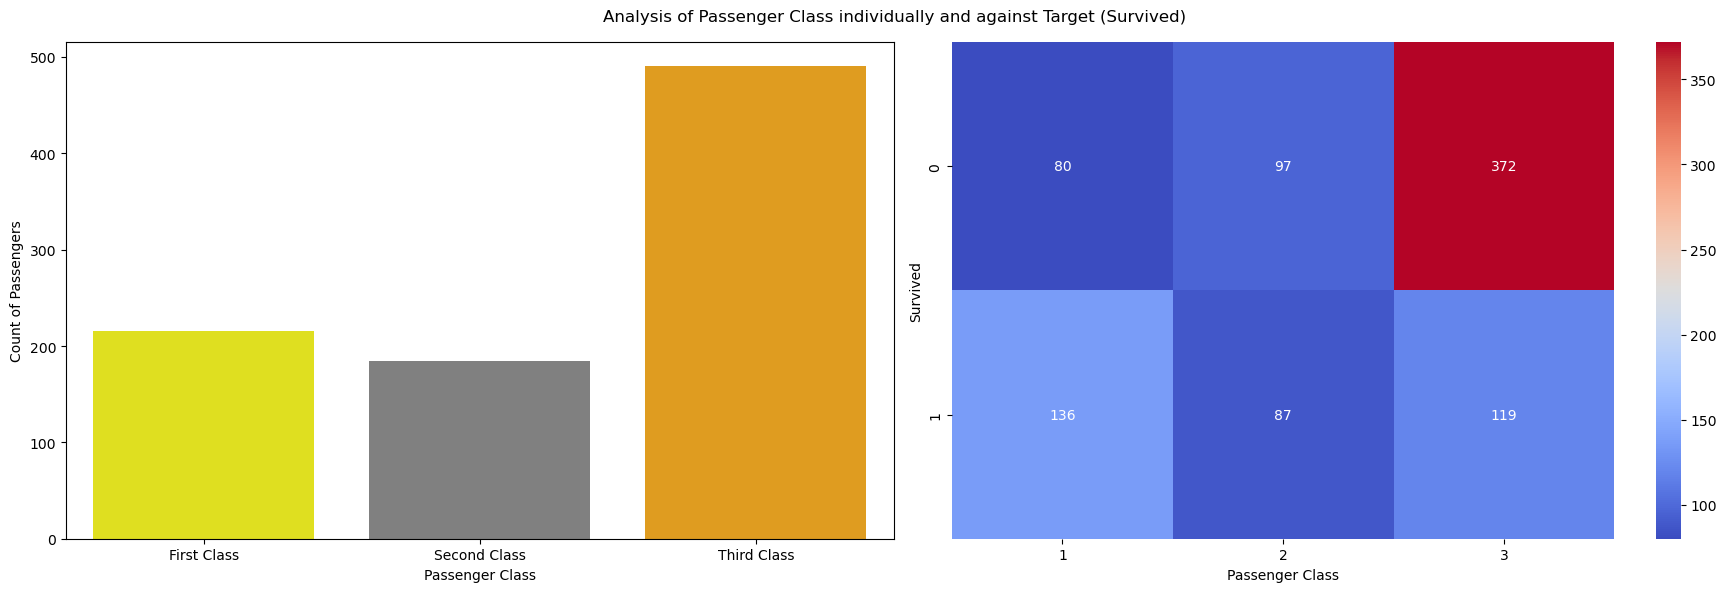

In [88]:
survival_rate("Pclass", True)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x=titanic_df.Pclass, palette=gsb, ax=axes[0])
axes[0].set_xlabel("Passenger Class")
xtick123(0, "First Class", "Second Class", "Third Class")
axes[0].set_ylabel("Count of Passengers")

c = pd.crosstab(titanic_df["Survived"], titanic_df["Pclass"])
sns.heatmap(c, annot=True, cmap="coolwarm", fmt="d", ax=axes[1])
axes[1].set_xlabel("Passenger Class")
axes[1].set_ylabel("Survived")

plt.suptitle("Analysis of Passenger Class individually and against Target (Survived)")
plt.tight_layout() # Best practice to prevent overlapping
plt.show()

*Report/Conclusions*
- There were significantly more third class passengers (\~500) compared to first class (\~210) and second class (\~190).
- The passenger class with the most number of casualties was third class (372).
- The passenger class with the least number of casualties was first class (80).
- The passenger class with the highest amount of survivors was first class (136)
- The fact that first class had the highest number of survivors and least amount of fatalities (63% survival rate) strongly suggests passenger class effected the chance of survival.
- The fact that third class had only 119 survivors, while also having the highest number of passengers (24% survival rate) helps the above theory.
- The passenger class with the least number of survivors was second class (87), however the survival rate was 47%
- The survival rate percentage descends in unison with the passenger class.

**Feature 2: Sex**\
Sex refers to the sex/gender of the passenger. There are two possibilities: "male" and "female".\
It's known from history and pop culture that *in general*, women's lives were prioritised on the lifeboats after the ship crashed. Due to this, I expect to see the survival rate for women be significantly higher.\
I also expect to see more men on the ship, as this is the 1910's, where gender roles were vastly different to that of today: men more often worked while women tended to stay home. Many of the passengers on the Titanic were those searching to work in the new-world, so I would personally expect to see more "male" in the dataset.

In [64]:
survival_rate("Sex", True)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


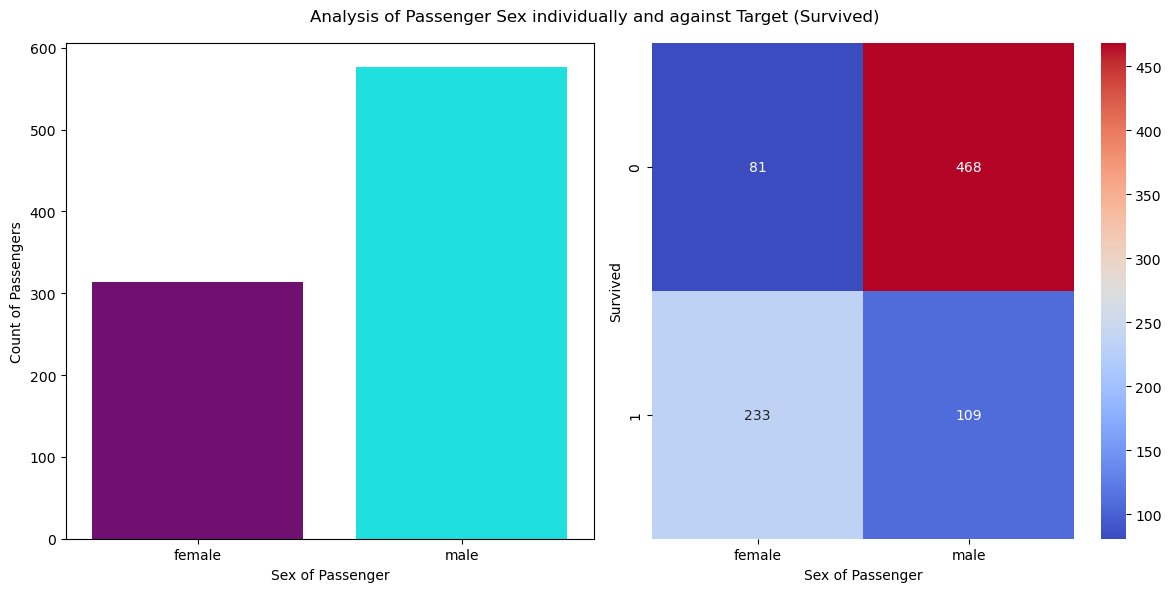

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x=titanic_df.Sex, palette=mf, ax=axes[0])
axes[0].set_xlabel("Sex of Passenger")
axes[0].set_ylabel("Count of Passengers")

c = pd.crosstab(titanic_df["Survived"], titanic_df["Sex"])
sns.heatmap(c, annot=True, cmap="coolwarm", fmt="d", ax=axes[1])
axes[1].set_xlabel("Sex of Passenger")
axes[1].set_ylabel("Survived")

plt.suptitle("Analysis of Passenger Sex individually and against Target (Survived)")
plt.tight_layout() # Best practice to prevent overlapping
plt.show()

*Report/Conclusions*
- There were in fact more men on the ship. \~580 men to \~300 women.
- The survival rate for women was astronomically higher than for men, with 74% of women surviving, while less than 19% of men did.
- It may be worth looking at the men who survived, perhaps by their class or by how much they paid for their ticket (signs of status/wealth/aristocracy).

**Feature 3: Age**\
"Age" refers to the age of the passenger in question. It's worth disclaiming that the age data is not 100% accurate, because of the null-value interpretation performed in pass 1, but should still be intact enough to draw some conlusions. Age is an integer column, accepting only whole numbers.\
\
I'm going to create a new feature also, called age_category that divides the ages into groups for a more categorical analysis approach.\
\
My predictions for this feature is that age will have an effect on the survival of the passenger. I expect to see children have higher survival rates, as well as possibly the elderly.

In [66]:
edges2 = [0,1,12,18,65, float('inf')]
titanic_df['age_category'] = pd.cut((titanic_df['Age']), bins=edges2, labels=['Infant', 'Child', 'Adolescent', 'Adult', 'Older Adult'])

age_category
Infant         0.857143
Child          0.508475
Adolescent     0.428571
Adult          0.363514
Older Adult    0.125000
Name: Survived, dtype: float64


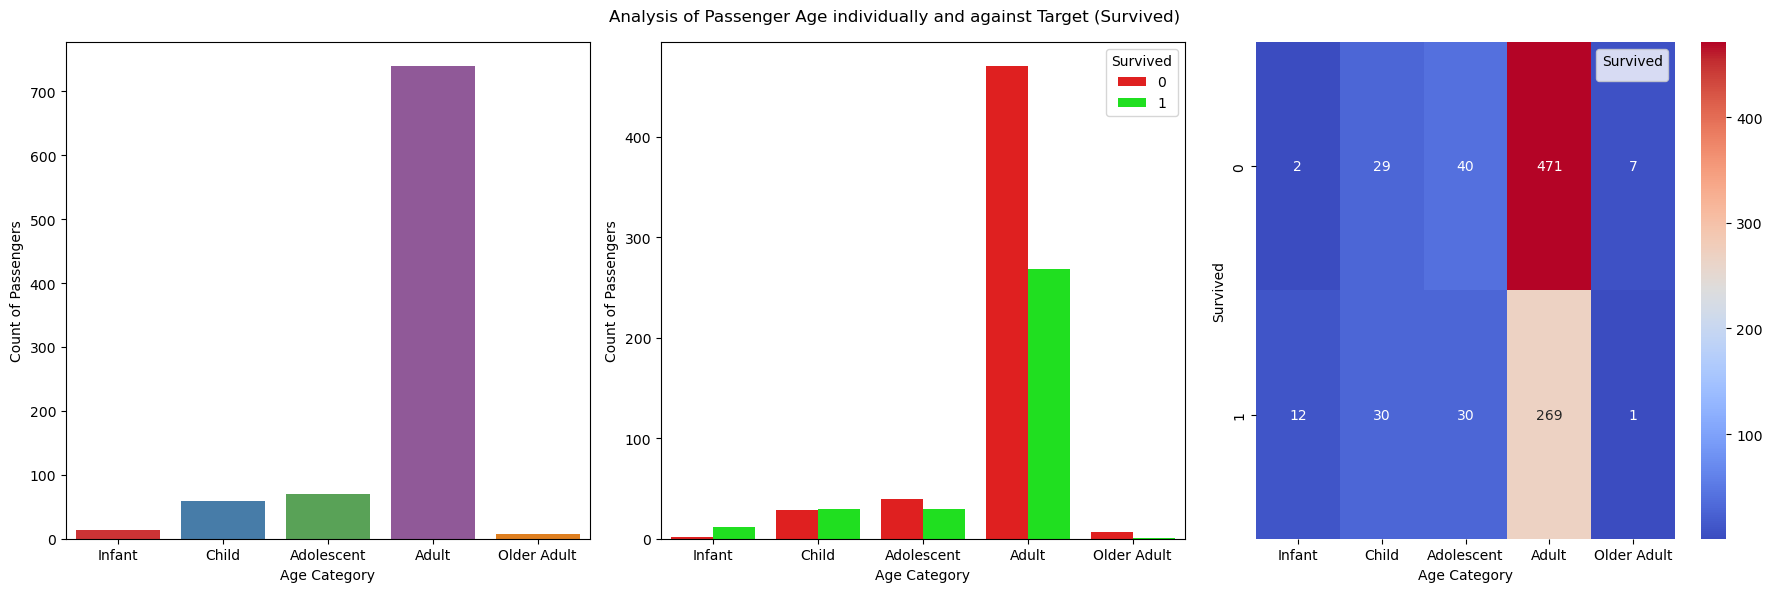

In [68]:
survival_rate("age_category", True)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x=titanic_df.age_category, palette="Set1", ax=axes[0])
axes[0].set_xlabel("Age Category")
axes[0].set_ylabel("Count of Passengers")

sns.countplot(x=titanic_df.age_category, hue='Survived', data=titanic_df, palette=yn, ax=axes[1])
axes[1].set_xlabel('Age Category')
axes[1].set_ylabel('Count of Passengers')

d = pd.crosstab(titanic_df["Survived"], titanic_df["age_category"])
sns.heatmap(d, annot=True, cmap="coolwarm", fmt="d", ax=axes[2])
axes[2].set_xlabel("Age Category")
axes[2].set_ylabel("Survived")

# Set a common title for all subplots
plt.suptitle("Analysis of Passenger Age individually and against Target (Survived)")
plt.legend(title='Survived', labels=['No', 'Yes'])

# Show the plot
plt.tight_layout() # Best practice to prevent overlapping
plt.show()

*Report/Conclusions*
- The vast majority of passengers on the ship were adults (18-65).
- Infants (0-1) and Older Adults (65+) had very few passengers.
- Infants had the highest survival rate with 86%, although the sample size was quite small (14 entries)
- Children (1-12) had the second highest survival rate with 51%.
- Adolescents (13-17) had the third highest with 43%, then adults with 36%, followed by older adults with just 12.5% survival.
- The data indicates that survival rate decreased with the age of the passenger.
- I was surprised by the immensely low survival rate for older passengers.

**Features 4 & 5: SibSp & Parch**\
The 4th and 5th features refer to the passenger's family members aboard the ship.\
SipSp refers to the number of siblings and spouses the passenger has aboard the ship.\
Parch refers to the number of parents and children the passenger has aboard the ship.\
I'll look at these features individually to see if having any relatives/spouses aboard the ship effects the survival rate.

*1. Siblings/Spouses*

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


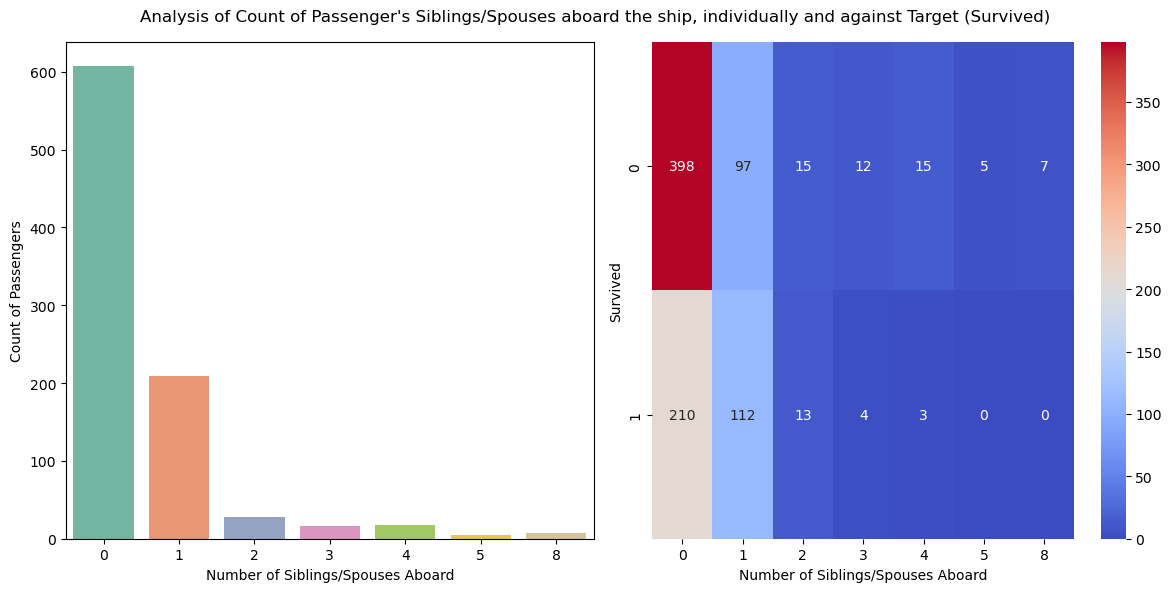

In [137]:
survival_rate("SibSp", True)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x=titanic_df.SibSp, palette="Set2", ax=axes[0])
axes[0].set_xlabel("Number of Siblings/Spouses Aboard")
axes[0].set_ylabel("Count of Passengers")

c = pd.crosstab(titanic_df["Survived"], titanic_df["SibSp"])
sns.heatmap(c, annot=True, cmap="coolwarm", fmt="d", ax=axes[1])
axes[1].set_xlabel("Number of Siblings/Spouses Aboard")
axes[1].set_ylabel("Survived")

plt.suptitle("Analysis of Count of Passenger's Siblings/Spouses aboard the ship, individually and against Target (Survived)")
plt.tight_layout() # Best practice to prevent overlapping
plt.show()

*Report/Conclusions*
- The vast majority of passengers had no siblings/spouses on board.
- Quite a few (\~200) passengers had 1 sib/spouse on board, presumably their spouse.
- The survival rate for those with 1 sibling/spouse on board was highest, at 54%
- The survival rate for those with 2 siblings/spouses on board was second highest, with 46%.
- The survival rates for those with 5 and 8 siblings/spouses on board was 0%, although there were only 5 and 7 passengers respectively in that sample.
- Those with no siblings had a survival rate of 35%.
- It seems having 1 or 2 siblings/spouses on board resulted in a higher rate of survival, followed by 0. For 3+ siblings/spouses, the survival rate appears to decrease with number.

*2. Parents/Children*

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


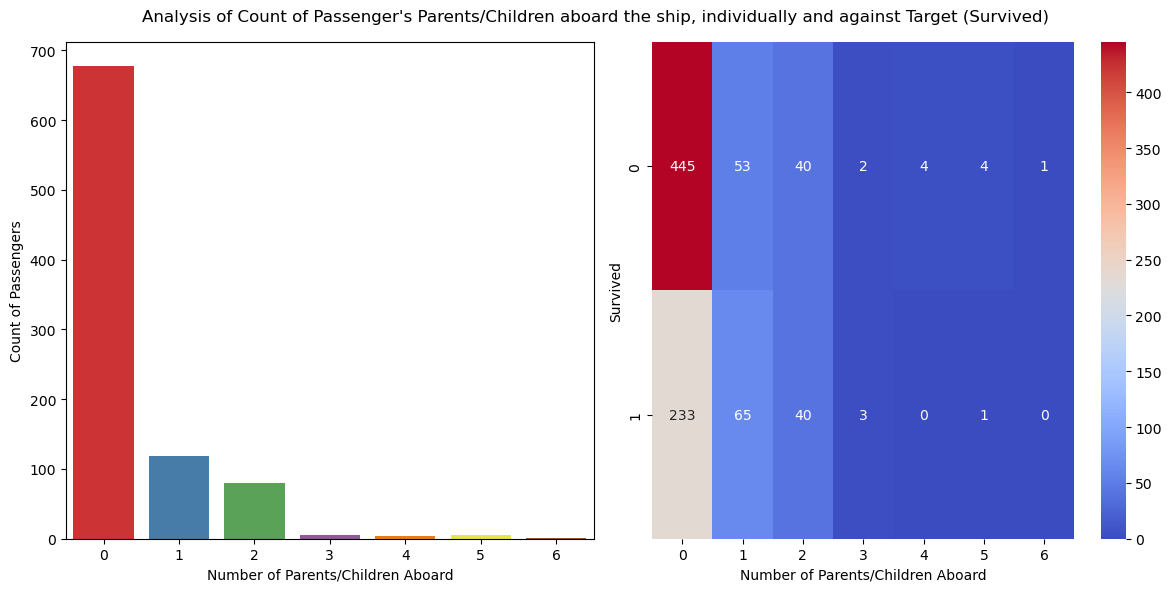

In [70]:
survival_rate("Parch", True)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x=titanic_df.Parch, palette="Set1", ax=axes[0])
axes[0].set_xlabel("Number of Parents/Children Aboard")
axes[0].set_ylabel("Count of Passengers")

c = pd.crosstab(titanic_df["Survived"], titanic_df["Parch"])
sns.heatmap(c, annot=True, cmap="coolwarm", fmt="d", ax=axes[1])
axes[1].set_xlabel("Number of Parents/Children Aboard")
axes[1].set_ylabel("Survived")

plt.suptitle("Analysis of Count of Passenger's Parents/Children aboard the ship, individually and against Target (Survived)")
plt.tight_layout() # Best practice to prevent overlapping
plt.show()

*Report/Conclusions*
- The vast majority (nearly 700) of passengers had no parents or children on board.
- The survival rate for those with 1,2 or 3 parents/children was relatively high, with between 50 and 60%. This is likely because the survival rate for women and children was quite high also.
- The survival rate for those with no parents/children was just 34%. I feel this may correlate with the working class men heading to America for work.
- There were very few passengers with 3+ parents/children on board.

**Feature 6: Fare**\
"Fare" refers to the price that the passenger paid for the ticket. I would assume the price was in pounds (£), however the currency is irrelevant since we're dealing with integers.\
\
I'm going to do a similar thing as I've done before, and assign the numerical values into categories, or intervals. To this, I must first find the maximum fare. Since this is currency, I already know the minimum will be 0.

In [71]:
titanic_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [72]:
edges3 = [0,5,10,20,30,40,50,75,100,200,300, float('inf')]
titanic_df['fare_category'] = pd.cut((titanic_df['Fare']), bins=edges3, labels=['$0-$5', '$5-$10', '$10-$20',
                                                                              '$20-$30', '$30-$40', '$40-50',
                                                                              '$50-$75', '$75-$100', '$100-$200',
                                                                              '$200-$300', '$300+'])

In [73]:
survival_rate("fare_category", True)

fare_category
$0-$5        0.000000
$5-$10       0.206897
$10-$20      0.424581
$20-$30      0.443662
$30-$40      0.396552
$40-50       0.250000
$50-$75      0.555556
$75-$100     0.795455
$100-$200    0.757576
$200-$300    0.647059
$300+        1.000000
Name: Survived, dtype: float64


Text(0, 0.5, 'Fare ($)')

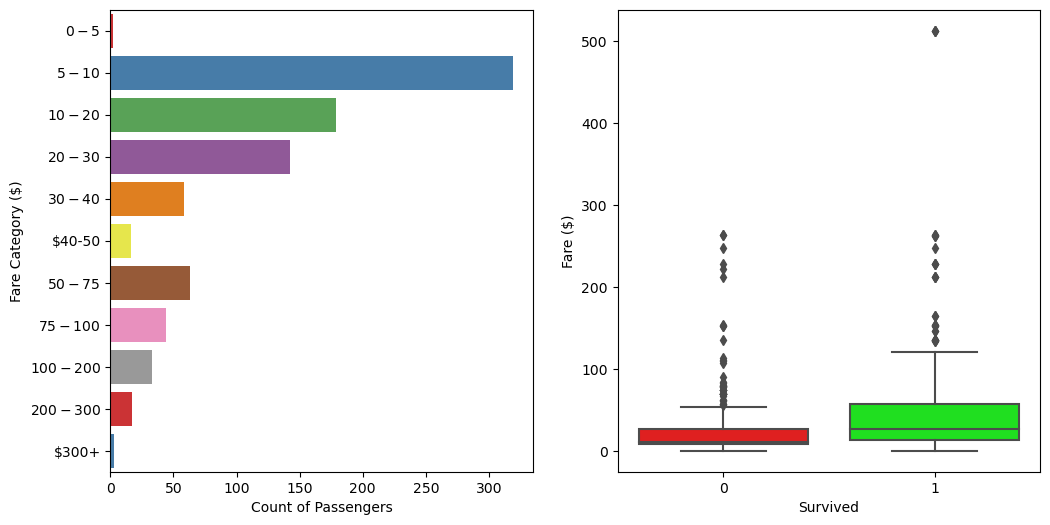

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(y=titanic_df.fare_category, palette="Set1", ax=axes[0])
axes[0].set_xlabel("Count of Passengers")
axes[0].set_ylabel("Fare Category ($)")

sns.boxplot(x=titanic_df.Survived, y=titanic_df.Fare, palette=yn, ax=axes[1])
axes[1].set_xlabel("Survived")
axes[1].set_ylabel("Fare ($)")

*Report/Conclusions*
- Most passengers paid between 5 and 30 pounds for their ticket. Some passengers paid upwards of 300 pounds.
- From the boxplot, you can see that those who survived on average paid more for their ticket.

**Feature 7: Embarked**\
The feature "Embarked" refers to the port that the passenger boarded the Titanic from. There are three possibilities: Southampton (S), Cherbourg (C), & Queenstown (Q) which is now modern-day Cobh in Cork.

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


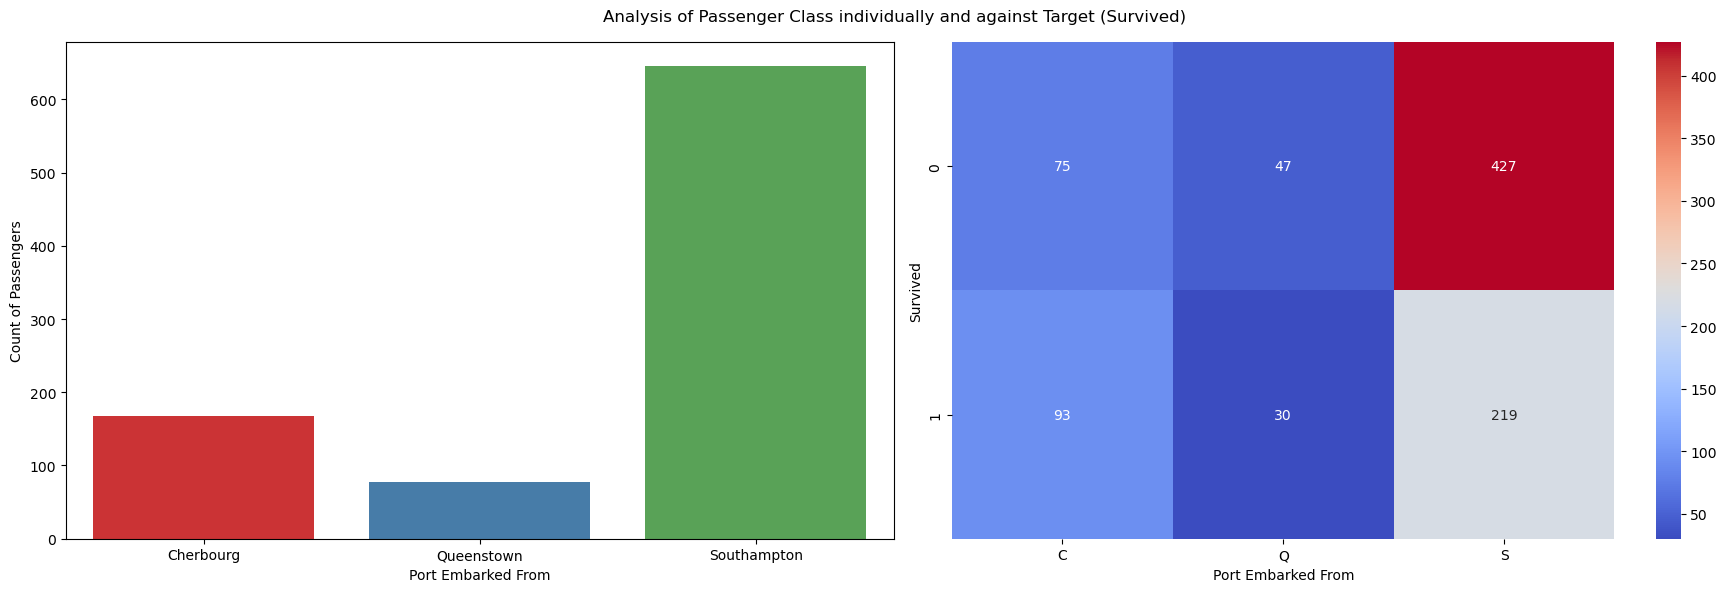

In [75]:
survival_rate(titanic_df.Embarked, True)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x=titanic_df.Embarked, palette="Set1", ax=axes[0])
axes[0].set_xlabel("Port Embarked From")
xtick123(0, "Cherbourg", "Queenstown", "Southampton")
axes[0].set_ylabel("Count of Passengers")

c = pd.crosstab(titanic_df["Survived"], titanic_df["Embarked"])
sns.heatmap(c, annot=True, cmap="coolwarm", fmt="d", ax=axes[1])
axes[1].set_xlabel("Port Embarked From")
axes[1].set_ylabel("Survived")

plt.suptitle("Analysis of Passenger Class individually and against Target (Survived)")
plt.tight_layout() # Best practice to prevent overlapping
plt.show()

*Report/Conclusions*
- The majority of passengers boarded at Southampton, with the least boarding at Queenstown.
- Those who boarded in Cherbourg had the highest survival rate at 55%.
- Those who boarded at Queenstown had a 39% survival rate, while those at Southampton had only a 34% rate.

**Feature 8: pTitle**\
The final feature I'll be analysing is the one I created during pass 1, pTitle. To refresh, pTitle is a column of passenger's titles, extracted from their name e.g. Mr, Mrs. Miss etc.\
As touched on earlier, there are 17 different titles to compare here, so a horizontal bar chart will probably be the best choice of graph.

pTitle
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64


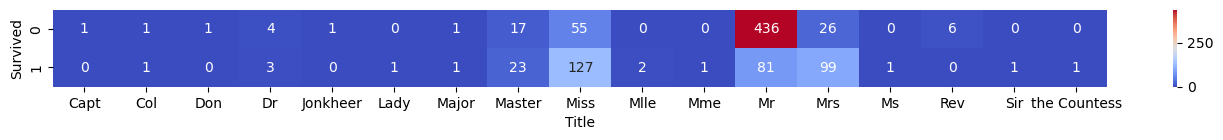

In [76]:
survival_rate("pTitle", True)
fig, axes = plt.subplots(1, 1, figsize=(17, 1))

c = pd.crosstab(titanic_df["Survived"], titanic_df["pTitle"])
sns.heatmap(c, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Title")
plt.ylabel("Survived")
plt.show()


*Report/Conclusions*
- The most common title was "Mr.", but this was expected as the majority of passengers were men.
- People with the title "Mr." had a staggeringly low 15.7% chance of survival.
- Women and Chidren with titles "Miss", "Mrs", and "Master" had survival rates of 70%, 79% and 58%, respectively.

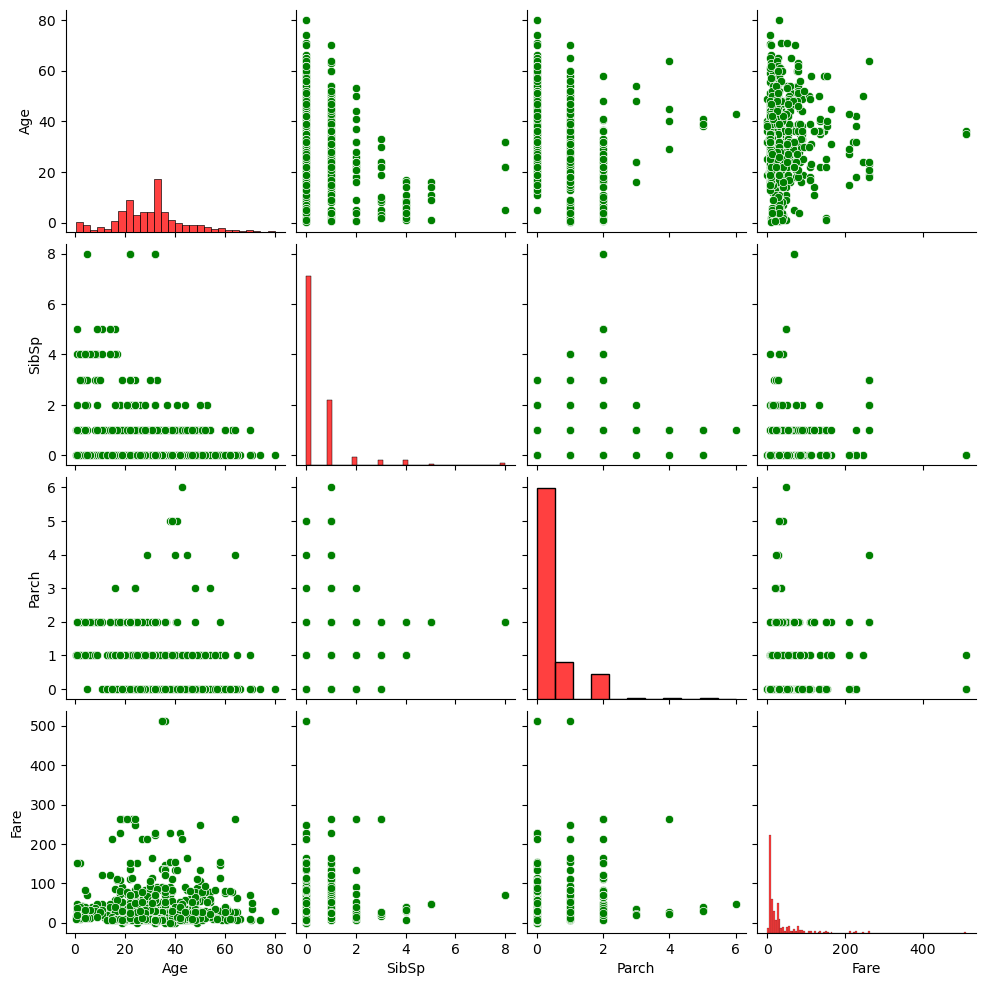

In [121]:
sns.pairplot(titanic_df, vars=["Age", "SibSp", "Parch", "Fare"], diag_kws={'color': 'red'}, plot_kws={'color': 'green'})

*Report/Conclusions*
- The number of siblings/spouses a passenger has on board seems to decrease with age.
- For the lower values (0,1,2), older age suggests less parents/children on board (Parch)
- Age doesn't seem to affect fare (and vice-versa) in any way.
- Perhaps the fare tends to be lower the more siblings/spouses a passenger has on board? I'm not sure that's conclusive in any way from the above graph.
- There may be something to draw between Parch and SibSp. I'll look into their correlation in the next pass.
- Similarly to SibSp, the fare tends to be lower the more parents/children a passenger has. I think this may be indicative of class. It's my understanding that many years ago (and even today), those of a "lower societal class" tend to have more children. I'll test that out in a graph in the next pass.

##End of Answer 2##

# Task 3: Third pass - relationships between features and target

##Start of Answer 3##

**Correlation Analysis 1: Pearson's**

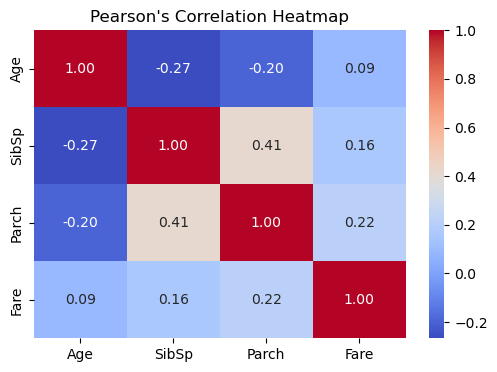

In [77]:
num_cols = titanic_df.select_dtypes(include=['number'])
corr = num_cols.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
#               ^ display corr, ^ colour map,  ^ 2 decimal p
plt.title("Pearson's Correlation Heatmap")
plt.show()

*Report/Conclusions*
- There aren't even and moderately strong correlations between the numerical values in the titanic dataset, according to Pearson's.
- There is a weak to moderate correlation between SibSp (siblings & spouses aboard) and Parch (parents & children aboard), suggesting whole families travelled on the Titanic.

**Correlation Analysis 2: Phik**

interval columns not set, guessing: ['Age', 'SibSp', 'Parch', 'Fare']


<Axes: title={'center': 'Phik Correlation Heatmap'}>

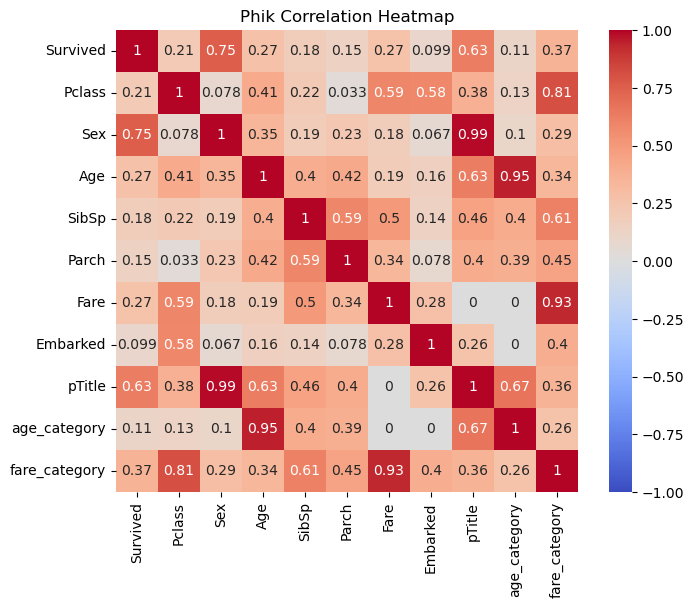

In [89]:
corr = titanic_df.phik_matrix()

plt.figure(figsize=(8,6))
plt.title("Phik Correlation Heatmap")
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, vmin=-1, vmax=1)

*Report/Conclusions*
- Survived and Sex has a fairly strong positive relationship, as the correlation coefficient sits at 0.75. I learned from analysing the Sex feature in relation to the target: Survived, that women had a much higher chance of survival, and men a much less.
- Survived has a moderate correlation with pTitle. I'm not sure this suggests anything. I could have tried to single out titles that depict aristocracy, but there wasn't really enough data to do that.
- There is a weak positive correlation (.37) between Survived and fare_category, perhaps suggesting that fare plays an effect on survival. However, the "fare" category only has a .27 corr coeff. with Survived, suggesting there's little to no correlation there.
- Passenger Class (Pclass) has a high correlation with fare_category, which makes sense, since you'd expect your ticket price to be dependent upon the passenger class you're assigned.
- A moderate positive relationship between passenger class and embarked port possibly suggests that where you boarded the ship played a role in your class.
- I was surprised to see a low positive correlation coefficient between passenger class and Survived, since previous analysis seemed to strongly suggest there was a correlation between the two. Perhaps this is still because of the number of men who died on the ship, regardless of class. I'll look into this more.
- The strong almost perfect correlation between Sex and Passenger title (pTitle) makes a lot of sense and is expected.
- A moderate positive correlation between SibSp (Siblings and Spouses aboard) and Parch (Parents and Children aboard) suggests that there were two main groups of people on the Titanic. Single men and families.

**Analysing the Survival Rate of Male/Female by Passenger Class**

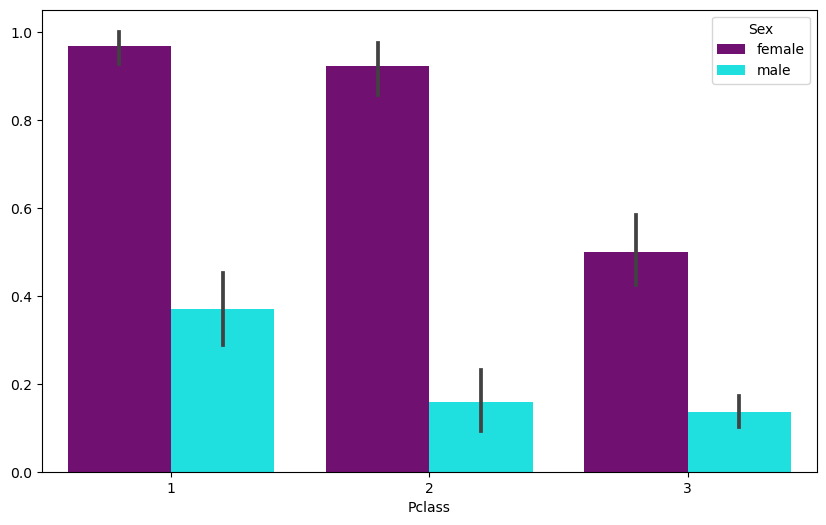

In [145]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(data=titanic_df, x="Pclass", y=(titanic_df['Survived'].cat.codes), hue="Sex", palette=mf)
plt.xlabel=("Passenger Class")
plt.ylabel=("Survival Rate")
plt.show()

*Report/Conclusions*
- Following on from the conclusion above about the lack of correlation between Pclass and Survived, I felt that the low correlation might be a result of the gender split.
- The survival rate for women in first and second class were over 90%!
- While the male survival rate did decrease with passenger class, they were still very low.
- In my opinion, the correlation should be higher than 0.21. My theory is that it's a problem with the way my Survived feature is defined. Currently, it's defined as a categorical variable of 0 or 1, rather than as a numeric. I had to use .cat.codes() function above to give a numeric representation of the categoric data. Perhaps if this was done for the above matrix, the correlation would improve. I try this below, but it doesn't change anything..

C:\Users\jackd\AppData\Local\Temp\ipykernel_20008\746355742.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



interval columns not set, guessing: ['Survived']


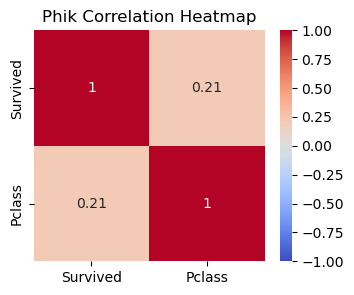

In [118]:
sur_pcl_titanic_df = titanic_df[['Survived', 'Pclass']]
sur_pcl_titanic_df['Survived'] = sur_pcl_titanic_df['Survived'].cat.codes
sur_pcl_corr = sur_pcl_titanic_df.phik_matrix()

plt.figure(figsize=(4, 3))
plt.title("Phik Correlation Heatmap")
sns.heatmap(sur_pcl_corr, annot=True, cmap="coolwarm", square=True, vmin=-1, vmax=1)
plt.show()

**Analysing the number of Parents/Children by Class**

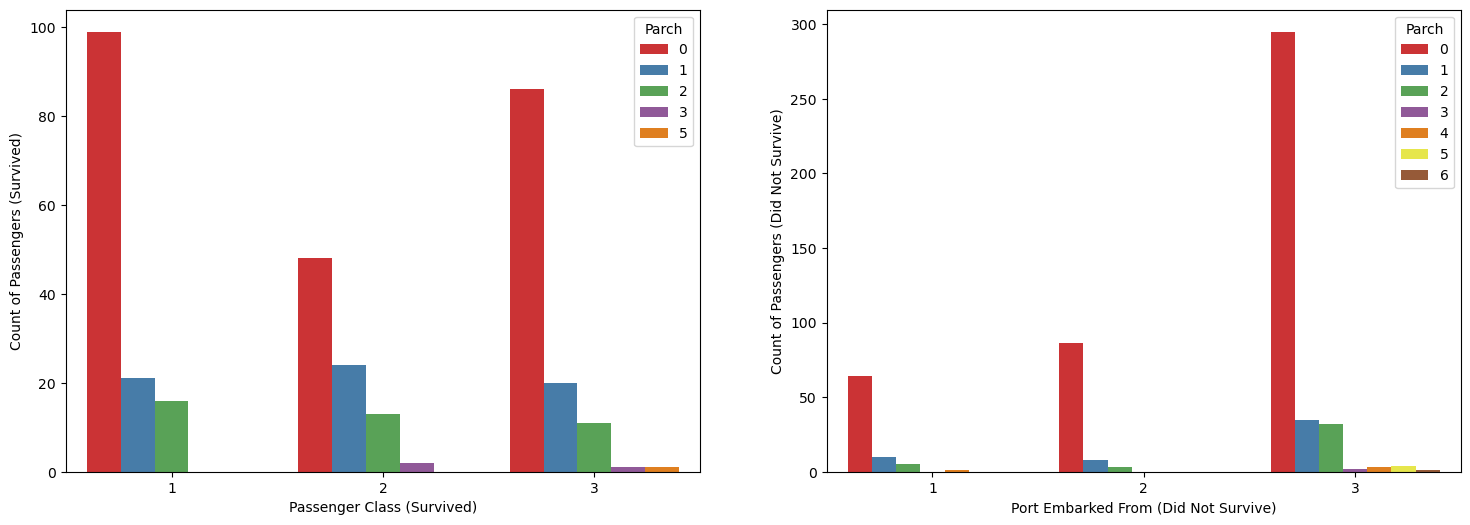

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(x=titanic_df[titanic_df['Survived'] == 1]['Pclass'], data=titanic_df, hue=titanic_df[titanic_df['Survived'] == 1]['Parch'], ax=axes[0], palette='Set1')
axes[0].set_xlabel("Passenger Class (Survived)")
axes[0].set_ylabel("Count of Passengers (Survived)")
sns.countplot(x=titanic_df[titanic_df['Survived'] == 0]['Pclass'], data=titanic_df, hue=titanic_df[titanic_df['Survived'] == 0]['Parch'], ax=axes[1], palette="Set1")
axes[1].set_xlabel("Passenger Class (Did Not Survive)")
axes[1].set_ylabel("Count of Passengers (Did Not Survive)")
plt.show()

*Report/Conclusion*
- I mentioned this theory at the end of pass 2, that I believed those of a lower societal class may tend to have more children.
- I tested this. It's quite difficult to see, but the higher counts of Parent/Child can all be found in the 3rd class bar. This may simply be a result of the majority of passengers being in third class, but nonetheless it's something to consider.

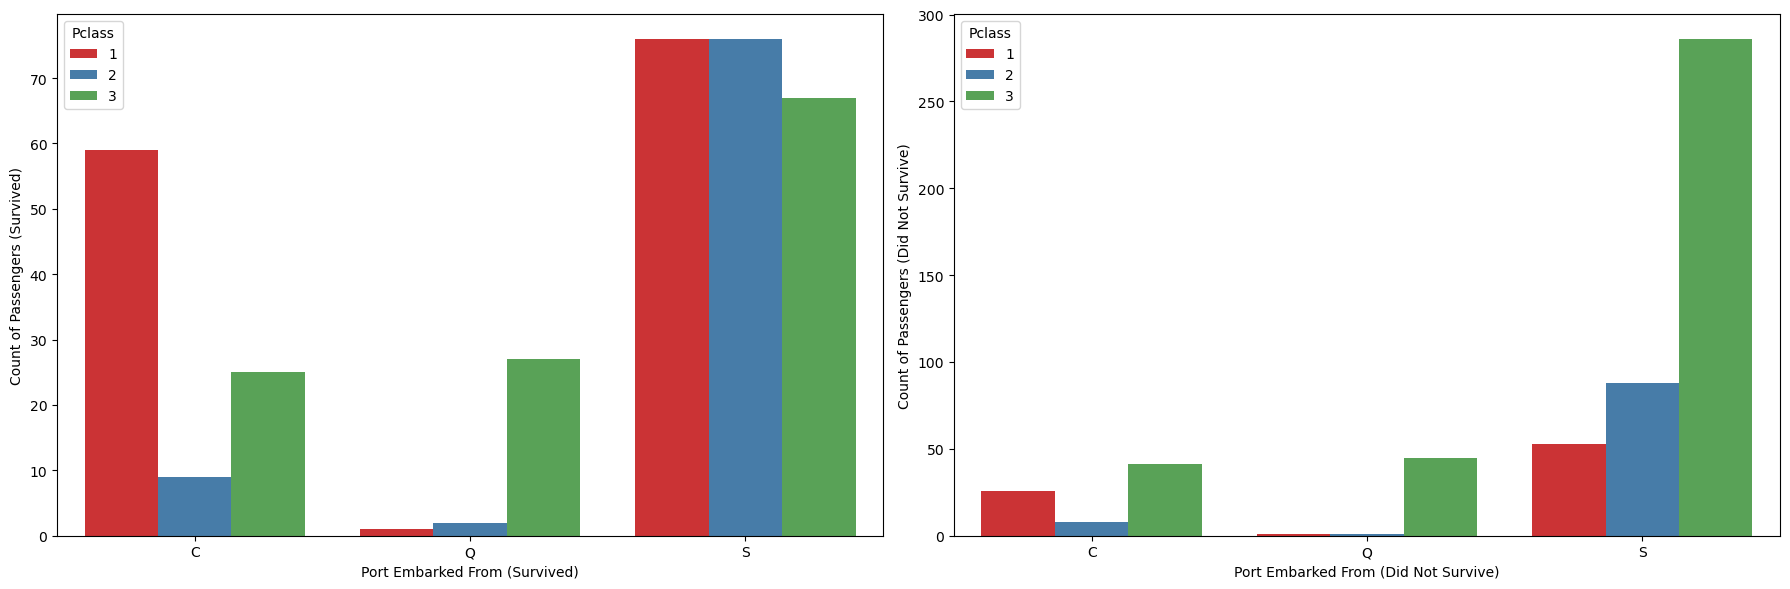

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(x=titanic_df[titanic_df['Survived'] == 1]['Embarked'], palette="Set1", hue=titanic_df[titanic_df['Survived'] == 1]['Pclass'], ax=axes[0])
axes[0].set_xlabel("Port Embarked From (Survived)")
axes[0].set_ylabel("Count of Passengers (Survived)")

sns.countplot(x=titanic_df[titanic_df['Survived'] == 0]['Embarked'], palette="Set1", hue=titanic_df[titanic_df['Survived'] == 0]['Pclass'], ax=axes[1])
axes[1].set_xlabel("Port Embarked From (Did Not Survive)")
axes[1].set_ylabel("Count of Passengers (Did Not Survive)")

plt.tight_layout()
plt.show()

*Report/Conclusions*
- Many first class passengers boarded at Cherbourg than any other class. They tended to survive.
- Very few first or second class passengers boarded at Queenstown, with the vast majority third-class.
- The majority of passengers in general boarded at Southampton with a decent split of first, second and third classes.

##End of Answer 3##

<H2>Final Conclusions: Titanic</H2>

- The dataset represented a diverse pool of passengers in terms of all categories, be it age, class, gender, or even the port they embarked from.
- Even though the correlation matrix disagrees (unless I'm reading it wrong), I believe theat being in a higher class (First/Second) definitely had a factor in survival.
- Sex most definitely had a factor in survival. Women had a much higher survival rate percentage than men, across all three classes. This is most prominently shown in pass two when comparing survival rates between passengers with title "Mr." and those with title "Miss" or "Mrs". I know from the movie and from history that there was a "women and children first" rule in place when boarding the lifeboats.
- Age played a role in survival. As found earlier, survival rate decreased alongside age.
- Having family on board didn't seem to have a distinguishable effect on survival. Most passengers had no family on board.
- It appears where you boarded played a role in Survival. At Cherbourg for example, many first class passengers boarded, and most of them survived. Even majority of third class passengers from Cherbourg survived.
- Those who survived on average paid a higher ticket price. Survival on the Titanic may have been almost "pay-to-win".


Overall, it's clear that features like passenger class (Pclass), age (Age), where the passenger embarked from (Embarked) and gender (Sex) all played significant roles in survival.



##End of EDA 2##

*Assignment Conclusion*
- Overall, I put a lot of time into this assignment, and encountered many hurdles I needed to overcome.
- I hope my final solution is acceptable, and hope that the knowledge I gained while completing it will stand to me.
- I feel more capable in python now after completing this assignment. I didn't quite know just how powerful the language and it's many external libraries can be.